# Name: Tufan Kundu
# Reg no: 24MDT0184
## DA1

# EDA on Automobile dataset

### Importing necessary libraries

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 

### Loading the dataset

In [15]:
df = pd.read_csv(r'D:\study material\VIT_Data_Science\Winter_Sem\Exploratory Data Analysis Lab\24_jan\automobile.csv')
df

symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two  convertible          rwd           front        88.6  ...   
2            two    hatchback          rwd           front        94.5  ...   
3           four        sedan          fwd           front        99.8  ...   
4           four        sedan          4wd           front        99.4  ...   
..           ...          ...          ...             ...         ...  ...   
200         four        sedan          rwd           front       109.1  ...   
201         four        sedan          rwd           front       109.1  ...   
202         four        sedan          rwd           front       109.1  ...   
203         four        sedan          rwd           front       109.1  ...   
204         four        sedan          rwd           front       109.1  ...   

     engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0            130         mpfi  3.47    2.68               9.0        111   
1            130         mpfi  3.47    2.68               9.0        111   
2            152         mpfi  2.68    3.47               9.0        154   
3            109         mpfi  3.19     3.4              10.0        102   
4            136         mpfi  3.19     3.4               8.0        115   
..           ...          ...   ...     ...               ...        ...   
200          141         mpfi  3.78    3.15               9.5        114   
201          141         mpfi  3.78    3.15               8.7        160   
202          173         mpfi  3.58    2.87               8.8        134   
203          145          idi  3.01     3.4              23.0        106   
204          141         mpfi  3.78    3.15               9.5        114   

     peak-rpm city-mpg highway-mpg  price  
0        5000       21          27  13495  
1        5000       21          27  16500  
2        5000       19          26  16500  
3        5500       24          30  13950  
4        5500       18          22  17450  
..        ...      ...         ...    ...  
200      5400       23          28  16845  
201      5300       19          25  19045  
202      5500       18          23  21485  
203      4800       26          27  22470  
204      5400       19          25  22625  

[205 rows x 26 columns]

In [17]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

##  Data cleaning

In [22]:
# Find out the number of values which are not numeric
df['price'].str.isnumeric().value_counts()

price
True     201
False      4
Name: count, dtype: int64

In [24]:
df['price'].loc[df['price'].str.isnumeric()== False]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [26]:
## setting the missing value to mean of price and convert the datatype to integer
price = df['price'].loc[df['price'] != '?']
pmean = price.astype(int).mean()
df['price'] = df['price'].replace('?',pmean).astype(int)
df['price']

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: int32

- 4 values in the price column were non numeric we replaced them by the mean value of the column

- ### cleaning the horsepower feild

In [30]:
df['horsepower'].str.isnumeric().value_counts()

horsepower
True     203
False      2
Name: count, dtype: int64

In [32]:
horsepower = df['horsepower'].loc[df['horsepower'] != '?']
hpmean = horsepower.astype(int).mean()
df['horsepower'] = df['horsepower'].replace('?',hpmean).astype(int)
df['horsepower']

0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: horsepower, Length: 205, dtype: int32

- ### Cleaning normalized losses feild

In [35]:
df['normalized-losses'].str.isnumeric().value_counts()

normalized-losses
True     164
False     41
Name: count, dtype: int64

In [37]:
nl = df['normalized-losses'].loc[df['normalized-losses'] != '?']
nlmean = nl.astype(int).mean()
df['normalized-losses'] = df['normalized-losses'].replace('?',nlmean).astype(int)
df['normalized-losses']

0      122
1      122
2      122
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: int32

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int32  
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [43]:
#calculate mean, median and mode of dataset height
mean = df["height"].mean()
median =df["height"].median()
mode = df["height"].mode()
print(mean , median, mode)

53.72487804878049 54.1 0    50.8
Name: height, dtype: float64


# Visualization

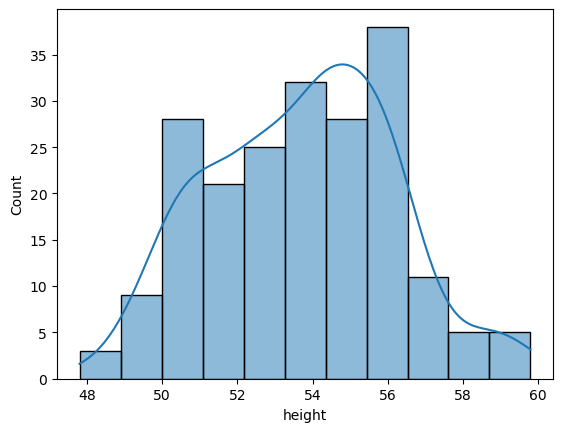

In [53]:
sns.histplot(df['height'],kde=True)
plt.show()

## Height column is right skewed

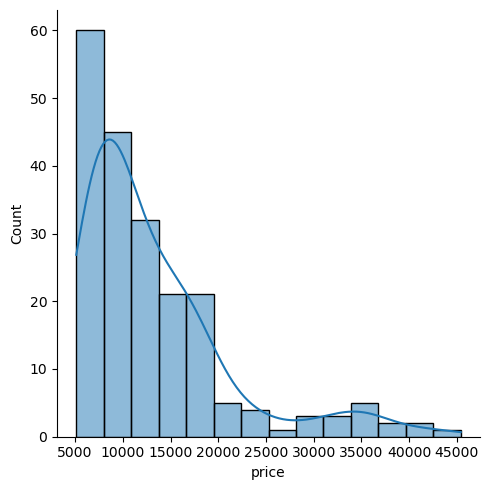

In [56]:
sns.displot(df['price'],kde=True)
plt.tight_layout()
plt.show()

## Price is left skewed

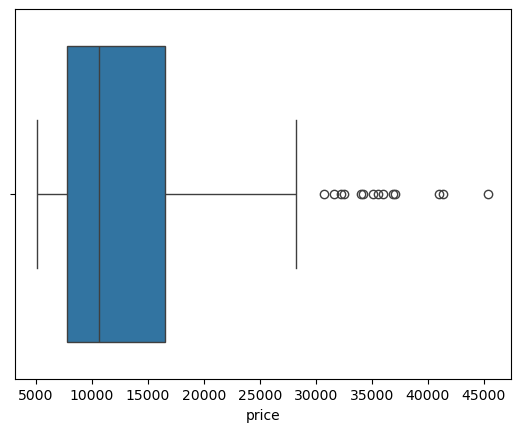

In [61]:
#boxplot for price of cars
sns.boxplot(x="price",data=df)
plt.show()

## Bivariate analysis

Text(0, 0.5, 'horsepower')

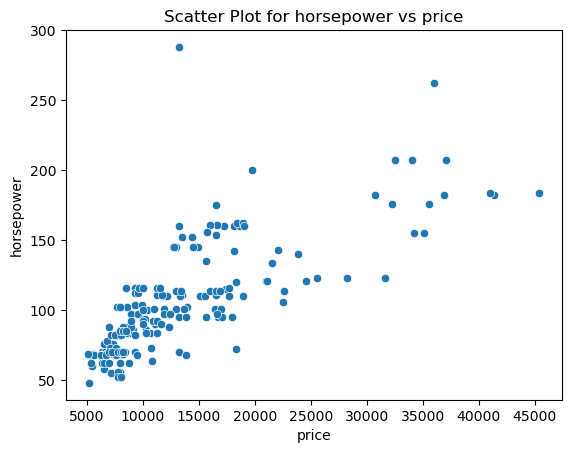

In [66]:
# plot the relationship between “horsepower” and ”price”
sns.scatterplot(x = df["price"],y = df["horsepower"])
plt.title("Scatter Plot for horsepower vs price")
plt.xlabel("price")
plt.ylabel("horsepower")

## As the horse power of the car increases, price also increases

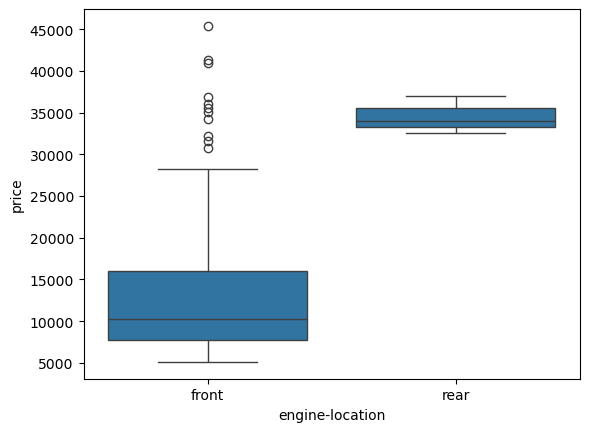

In [73]:
#boxplot
sns.boxplot(x="engine-location",y="price",data=df)
plt.show()

## Price of car with engine in the front are higher

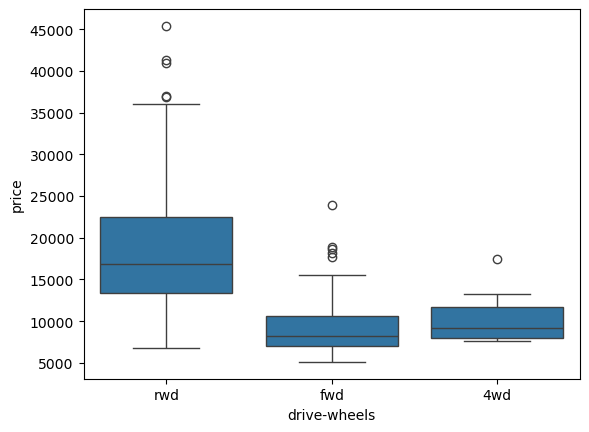

In [76]:
#boxplot to visualize the distribution of "price" with types of "drive-wheels"
sns.boxplot(x="drive-wheels", y="price",data=df)
plt.show()

## Multivariate analysis

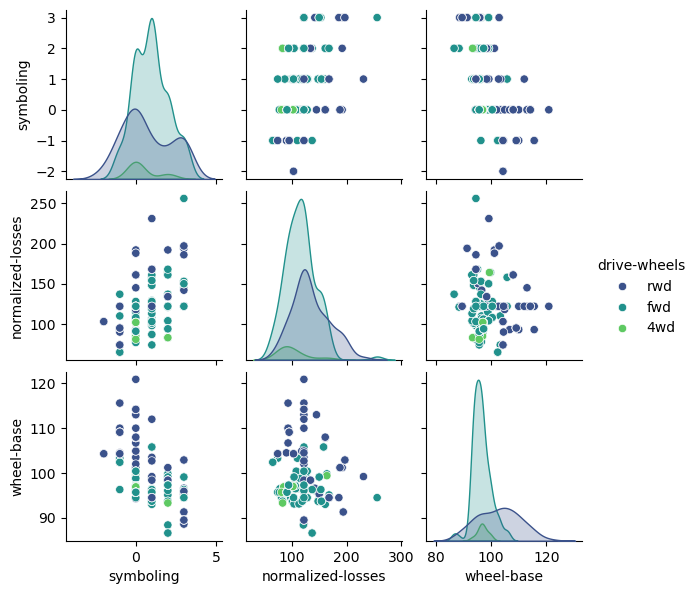

In [81]:
sns.pairplot(df,height=2,vars = ['symboling', 'normalized-losses','wheel-base'], hue="drive-wheels",palette='viridis')
plt.show()

In [83]:
from scipy import stats

corr = stats.pearsonr(df["price"], df["horsepower"])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 1.591033244659585e-39
cor:		 0.7579456217935241


Here the correlation of these two variable is 0.80957 which is close to +1 thus we can make sure that price and horsepower are highly positively correlated. Using pandas corr() function correlation between entire numerical record can be calculated.

In [86]:
correlation = df.corr(method='pearson',numeric_only=True)
correlation

symboling  normalized-losses  wheel-base    length  \
symboling           1.000000           0.465190   -0.531954 -0.357612   
normalized-losses   0.465190           1.000000   -0.056518  0.019209   
wheel-base         -0.531954          -0.056518    1.000000  0.874587   
length             -0.357612           0.019209    0.874587  1.000000   
width              -0.232919           0.084195    0.795144  0.841118   
height             -0.541038          -0.370706    0.589435  0.491029   
curb-weight        -0.227691           0.097785    0.776386  0.877728   
engine-size        -0.105790           0.110997    0.569329  0.683360   
compression-ratio  -0.178515          -0.114525    0.249786  0.158414   
horsepower          0.071380           0.203434    0.351985  0.554408   
city-mpg           -0.035823          -0.218749   -0.470414 -0.670909   
highway-mpg         0.034606          -0.178221   -0.544082 -0.704662   
price              -0.082201           0.133999    0.583168  0.682986   

                      width    height  curb-weight  engine-size  \
symboling         -0.232919 -0.541038    -0.227691    -0.105790   
normalized-losses  0.084195 -0.370706     0.097785     0.110997   
wheel-base         0.795144  0.589435     0.776386     0.569329   
length             0.841118  0.491029     0.877728     0.683360   
width              1.000000  0.279210     0.867032     0.735433   
height             0.279210  1.000000     0.295572     0.067149   
curb-weight        0.867032  0.295572     1.000000     0.850594   
engine-size        0.735433  0.067149     0.850594     1.000000   
compression-ratio  0.181129  0.261214     0.151362     0.028971   
horsepower         0.642176 -0.110114     0.750973     0.810705   
city-mpg          -0.642704 -0.048640    -0.757414    -0.653658   
highway-mpg       -0.677218 -0.107358    -0.797465    -0.677470   
price              0.728699  0.134388     0.820825     0.861752   

                   compression-ratio  horsepower  city-mpg  highway-mpg  \
symboling                  -0.178515    0.071380 -0.035823     0.034606   
normalized-losses          -0.114525    0.203434 -0.218749    -0.178221   
wheel-base                  0.249786    0.351985 -0.470414    -0.544082   
length                      0.158414    0.554408 -0.670909    -0.704662   
width                       0.181129    0.642176 -0.642704    -0.677218   
height                      0.261214   -0.110114 -0.048640    -0.107358   
curb-weight                 0.151362    0.750973 -0.757414    -0.797465   
engine-size                 0.028971    0.810705 -0.653658    -0.677470   
compression-ratio           1.000000   -0.205717  0.324701     0.265201   
horsepower                 -0.205717    1.000000 -0.803140    -0.770905   
city-mpg                    0.324701   -0.803140  1.000000     0.971337   
highway-mpg                 0.265201   -0.770905  0.971337     1.000000   
price                       0.070990    0.757946 -0.667449    -0.690526   

                      price  
symboling         -0.082201  
normalized-losses  0.133999  
wheel-base         0.583168  
length             0.682986  
width              0.728699  
height             0.134388  
curb-weight        0.820825  
engine-size        0.861752  
compression-ratio  0.070990  
horsepower         0.757946  
city-mpg          -0.667449  
highway-mpg       -0.690526  
price              1.000000

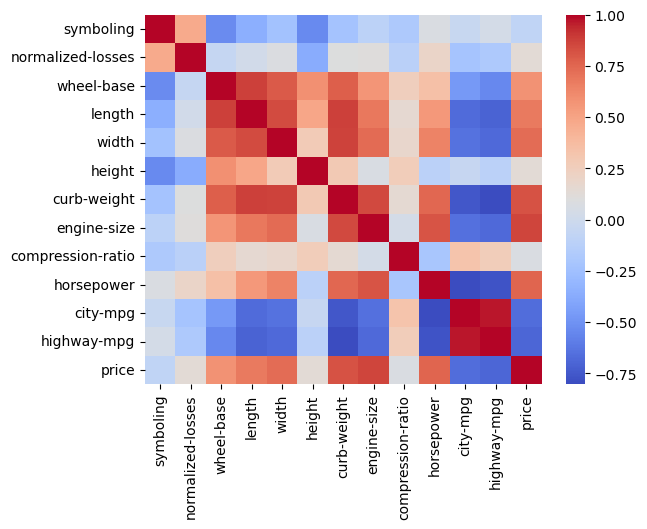

In [92]:
sns.heatmap(correlation,xticklabels=correlation.columns,
            yticklabels=correlation.columns,cmap='coolwarm')
plt.show()
          

# EDA on mtcars dataset

## Loading the dataset

In [100]:
df1 = pd.read_csv(r"D:\study material\VIT_Data_Science\Winter_Sem\Exploratory Data Analysis Lab\24_jan\mtcars.csv")
df1.head()

model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2

In [102]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


## checking for null values

In [105]:
df1.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

### no missing values

## checking for duplicates values

In [111]:
df1.duplicated().sum()

0

### No duplicate values

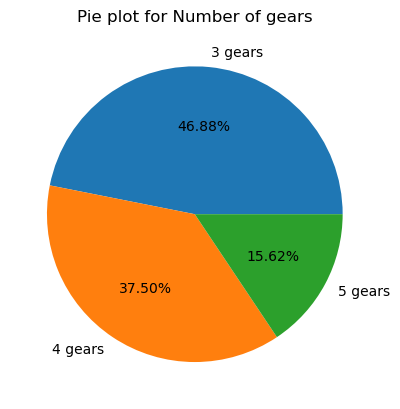

In [116]:
gear = df1['gear'].value_counts()
plt.pie(gear,labels=['3 gears','4 gears','5 gears'],autopct='%.2f%%')
plt.title("Pie plot for Number of gears")
plt.show()

### Majority of cars have 3 gears

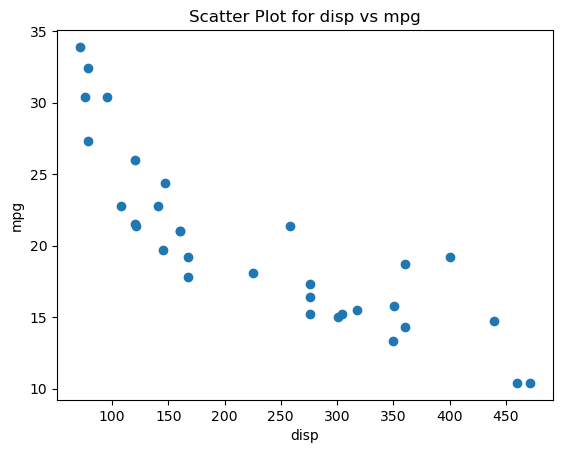

In [123]:

plt.scatter(df1["disp"], df1["mpg"])
plt.title("Scatter Plot for disp vs mpg")
plt.xlabel("disp")
plt.ylabel("mpg")
plt.show()

- as the displacemnt of the car increases the mileage decreases

In [126]:
df1.groupby(['gear','cyl'])['mpg'].agg([np.sum, np.mean])

sum    mean
gear cyl               
3    4     21.5  21.500
     6     39.5  19.750
     8    180.6  15.050
4    4    215.4  26.925
     6     79.0  19.750
5    4     56.4  28.200
     6     19.7  19.700
     8     30.8  15.400

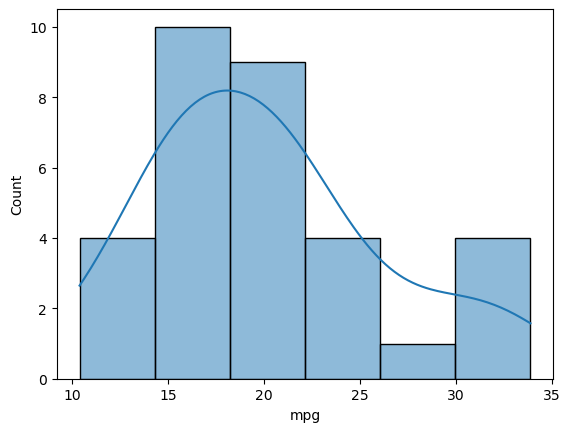

In [128]:
sns.histplot(df1['mpg'],kde=True)
plt.show()

- most cars have mpg in the range 13-23

In [131]:
correlation = df1.corr(method='pearson',numeric_only=True)
correlation


mpg       cyl      disp        hp      drat        wt      qsec  \
mpg   1.000000 -0.852162 -0.847551 -0.776168  0.681172 -0.867659  0.418684   
cyl  -0.852162  1.000000  0.902033  0.832447 -0.699938  0.782496 -0.591242   
disp -0.847551  0.902033  1.000000  0.790949 -0.710214  0.887980 -0.433698   
hp   -0.776168  0.832447  0.790949  1.000000 -0.448759  0.658748 -0.708223   
drat  0.681172 -0.699938 -0.710214 -0.448759  1.000000 -0.712441  0.091205   
wt   -0.867659  0.782496  0.887980  0.658748 -0.712441  1.000000 -0.174716   
qsec  0.418684 -0.591242 -0.433698 -0.708223  0.091205 -0.174716  1.000000   
vs    0.664039 -0.810812 -0.710416 -0.723097  0.440278 -0.554916  0.744535   
am    0.599832 -0.522607 -0.591227 -0.243204  0.712711 -0.692495 -0.229861   
gear  0.480285 -0.492687 -0.555569 -0.125704  0.699610 -0.583287 -0.212682   
carb -0.550925  0.526988  0.394977  0.749812 -0.090790  0.427606 -0.656249   

            vs        am      gear      carb  
mpg   0.664039  0.599832  0.480285 -0.550925  
cyl  -0.810812 -0.522607 -0.492687  0.526988  
disp -0.710416 -0.591227 -0.555569  0.394977  
hp   -0.723097 -0.243204 -0.125704  0.749812  
drat  0.440278  0.712711  0.699610 -0.090790  
wt   -0.554916 -0.692495 -0.583287  0.427606  
qsec  0.744535 -0.229861 -0.212682 -0.656249  
vs    1.000000  0.168345  0.206023 -0.569607  
am    0.168345  1.000000  0.794059  0.057534  
gear  0.206023  0.794059  1.000000  0.274073  
carb -0.569607  0.057534  0.274073  1.000000

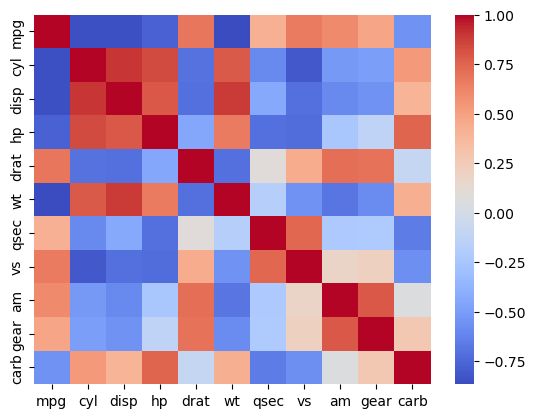

In [133]:
sns.heatmap(correlation,xticklabels=correlation.columns,
            yticklabels=correlation.columns,cmap='coolwarm')
plt.show()

# EDA on titanic dataset

In [136]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

titanic = pd.read_csv(r"D:\study material\VIT_Data_Science\Winter_Sem\Exploratory Data Analysis Lab\7_Feb\titanic_new.csv")

In [138]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [140]:
titanic.shape

(891, 12)

## Checking for missing values

In [143]:
titanic.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

### `Inference:`
- cabin column has the most missing values followed by Age and Embarked

In [148]:
## Percentage of women survived

women = titanic.loc[titanic.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)
rate_women

## percentage of men survived

men = titanic.loc[titanic.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)

print(f"{round(rate_women,3)*100}% women survived")
print(f"{round(rate_men,3)*100}% men survived")

74.2% women survived
18.9% men survived


### `Inference:`
- Women had a significantly higher chance of survival due to the "women and children first" policy.


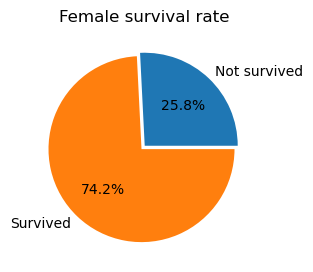

In [151]:
titanic[titanic['Sex'] == 'female'].Survived.groupby(titanic.Survived).count().plot(kind='pie',
figsize=(3, 6),explode=[0,0.05],autopct='%1.1f%%',labels=["Not survived","Survived"])
plt.title("Female survival rate")
plt.ylabel("")
plt.show()

### `Inference:`
- 74.2% of women survived, indicating majority of women survived.

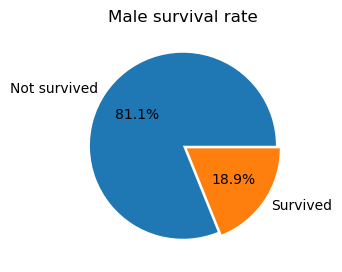

In [154]:
titanic[titanic['Sex'] == 'male'].Survived.groupby(titanic.Survived).count().plot(kind='pie',
figsize=(3, 6),explode=[0,0.05],autopct='%1.1f%%',labels=["Not survived","Survived"])
plt.title("Male survival rate")
plt.ylabel("")
plt.show()

### `Inference:`
- only 18.9% of men survived, indicating majority of men could not survive.

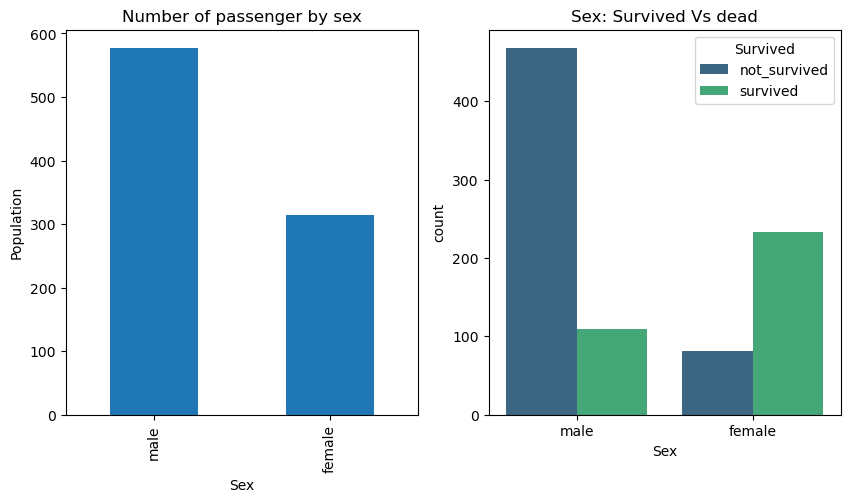

In [159]:
titanic['Survived'] = titanic['Survived'].map({0:"not_survived",1:"survived"})
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
titanic['Sex'].value_counts().plot.bar()
plt.title("Number of passenger by sex")
plt.ylabel("Population")
plt.subplot(1,2,2)
sns.countplot(x ="Sex",data = titanic, hue="Survived",palette='viridis')
plt.title("Sex: Survived Vs dead")
plt.show()


### `Inference:`
- Though more males than females onboarded, still majority of males did not survive.

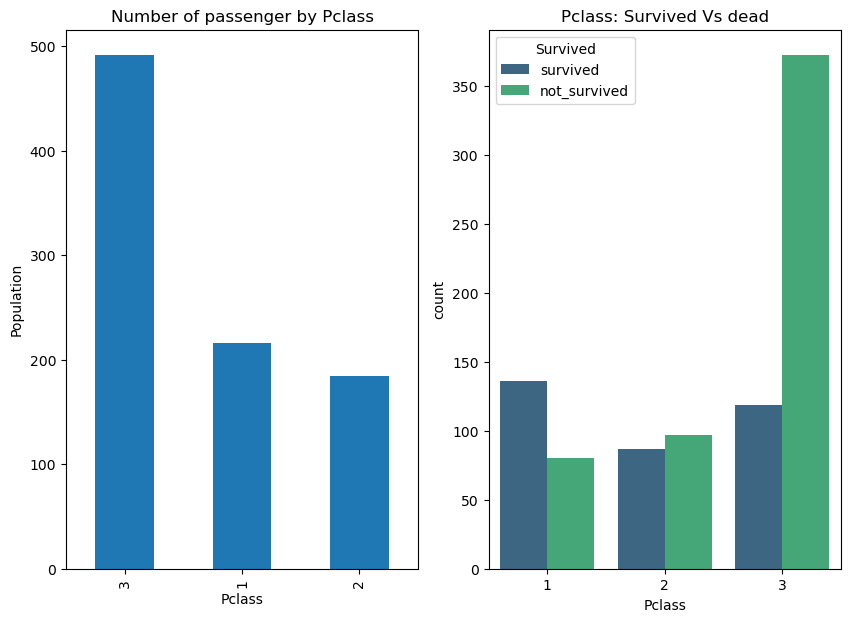

In [162]:
plt.figure(figsize = (10,7))
plt.subplot(1,2,1)
titanic['Pclass'].value_counts().plot.bar()
plt.title("Number of passenger by Pclass")
plt.ylabel("Population")
plt.subplot(1,2,2)
sns.countplot(x ="Pclass",data = titanic, hue="Survived",palette='viridis')
plt.title("Pclass: Survived Vs dead")
plt.show()


### `Inference`:
- Most people were from pclass 3 
- Survival rate was the lowest in Pclass 3
- Pclass 1 had the highest survival rate (higher-class passengers had better access to lifeboats).

In [165]:
titanic["Embarked"] = titanic["Embarked"].fillna("S")
titanic

PassengerId      Survived  Pclass  \
0              1  not_survived       3   
1              2      survived       1   
2              3      survived       3   
3              4      survived       1   
4              5  not_survived       3   
..           ...           ...     ...   
886          887  not_survived       2   
887          888      survived       1   
888          889  not_survived       3   
889          890      survived       1   
890          891  not_survived       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

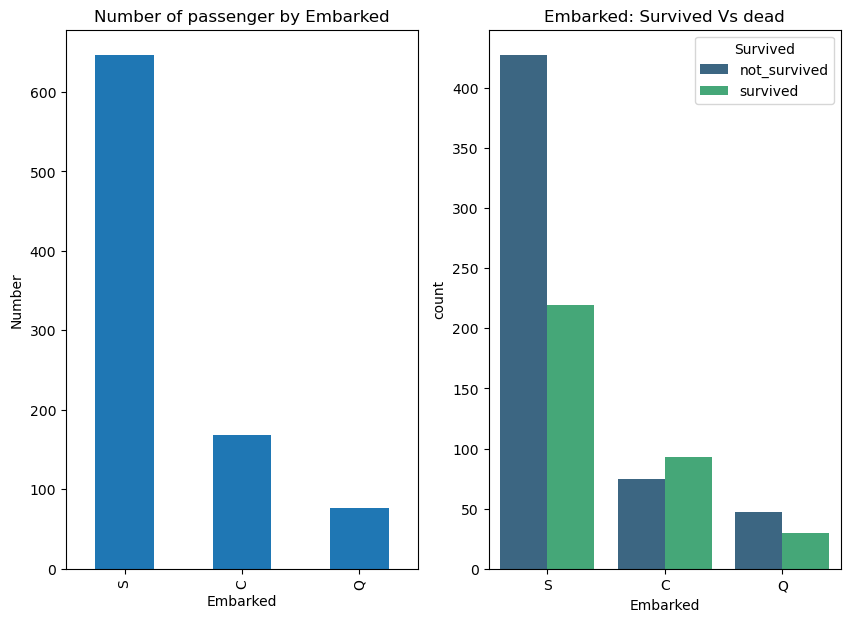

In [169]:
plt.figure(figsize = (10,7))
plt.subplot(1,2,1)
titanic['Embarked'].value_counts().plot.bar()
plt.title("Number of passenger by Embarked")
plt.ylabel("Number")
plt.subplot(1,2,2)
sns.countplot(x ="Embarked",data = titanic, hue="Survived",palette='viridis')
plt.title("Embarked: Survived Vs dead")
plt.show()


### `Inference:`
- Most passengers embarked from Southampton (S).
- Embarked from "C" (Cherbourg) had a higher survival rate (possibly more first-class passengers).
- Embarked from "S" (Southampton) had the lowest survival rate (many third-class passengers).

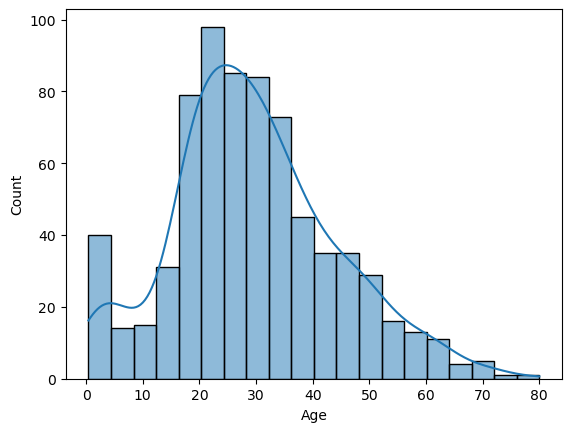

In [172]:
sns.histplot(titanic['Age'].dropna(), kde = True)
plt.show()

### `Inference:`
- Most passengers were between 20-40 years old.

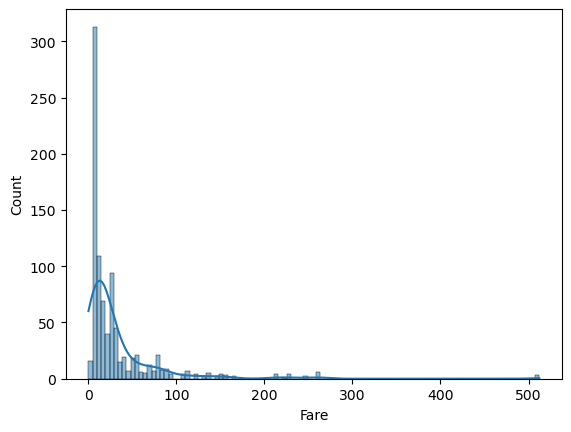

In [175]:
sns.histplot(titanic['Fare'], kde=True)
plt.show()

### `Inference:`
- Right-skewed distribution → Most fares were low, but a few passengers paid very high fares.
- Indicates wealthier passengers in first-class paid significantly more.


### Multivariate analysis

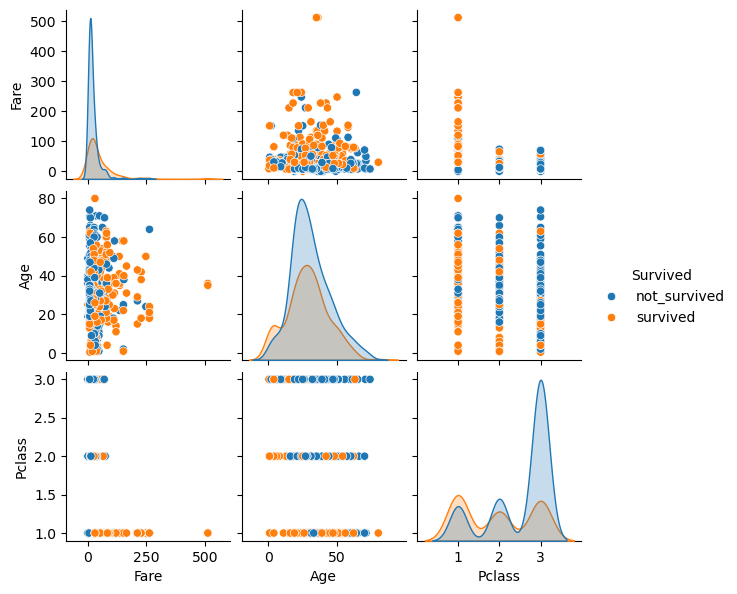

In [179]:
sns.pairplot(titanic,height=2,vars = [ 'Fare','Age','Pclass'], hue="Survived")
plt.show()


### `Inference:`
- Higher fares were associated with higher survival rates

## Correlation table with heatmap

In [183]:
titanic['Embarked'] = titanic['Embarked'].map({"S":1, "C":2,"Q":2,"NaN":0})
Tcorrelation = titanic.corr(method='pearson', numeric_only=True)
Tcorrelation

PassengerId    Pclass       Age     SibSp     Parch      Fare  \
PassengerId     1.000000 -0.035144  0.036847 -0.057527 -0.001652  0.012658   
Pclass         -0.035144  1.000000 -0.369226  0.083081  0.018443 -0.549500   
Age             0.036847 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
SibSp          -0.057527  0.083081 -0.308247  1.000000  0.414838  0.159651   
Parch          -0.001652  0.018443 -0.189119  0.414838  1.000000  0.216225   
Fare            0.012658 -0.549500  0.096067  0.159651  0.216225  1.000000   
Embarked       -0.022204 -0.074053  0.023233 -0.068734 -0.060814  0.162184   

             Embarked  
PassengerId -0.022204  
Pclass      -0.074053  
Age          0.023233  
SibSp       -0.068734  
Parch       -0.060814  
Fare         0.162184  
Embarked     1.000000

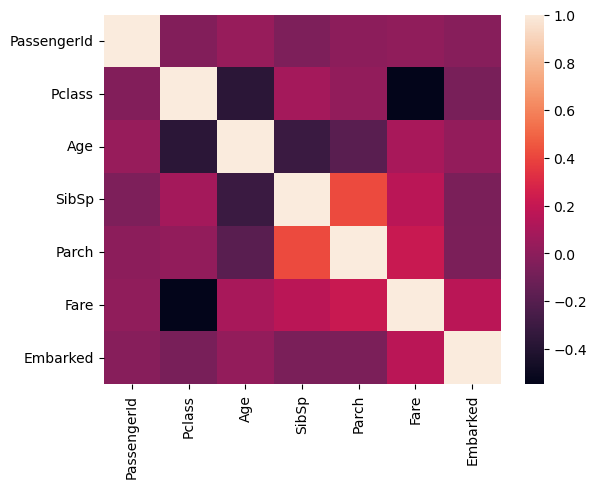

In [187]:
sns.heatmap(Tcorrelation,xticklabels=Tcorrelation.columns,
            yticklabels=Tcorrelation.columns)
plt.show()

### `Inference:`
- Fare and Pclass has strongest negative correlation
- Age had little correlation with survival

# Time series analysis on OPSD dataset

## loading a dataset

In [192]:
df = pd.read_csv(r"D:\study material\VIT_Data_Science\Winter_Sem\Exploratory Data Analysis Lab\7_Feb\opsd_germany_daily.csv")
df

Date  Consumption     Wind   Solar  Wind+Solar
0     2006-01-01   1069.18400      NaN     NaN         NaN
1     2006-01-02   1380.52100      NaN     NaN         NaN
2     2006-01-03   1442.53300      NaN     NaN         NaN
3     2006-01-04   1457.21700      NaN     NaN         NaN
4     2006-01-05   1477.13100      NaN     NaN         NaN
...          ...          ...      ...     ...         ...
4378  2017-12-27   1263.94091  394.507  16.530     411.037
4379  2017-12-28   1299.86398  506.424  14.162     520.586
4380  2017-12-29   1295.08753  584.277  29.854     614.131
4381  2017-12-30   1215.44897  721.247   7.467     728.714
4382  2017-12-31   1107.11488  721.176  19.980     741.156

[4383 rows x 5 columns]

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [196]:
#convert object to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df

Date  Consumption     Wind   Solar  Wind+Solar
0    2006-01-01   1069.18400      NaN     NaN         NaN
1    2006-01-02   1380.52100      NaN     NaN         NaN
2    2006-01-03   1442.53300      NaN     NaN         NaN
3    2006-01-04   1457.21700      NaN     NaN         NaN
4    2006-01-05   1477.13100      NaN     NaN         NaN
...         ...          ...      ...     ...         ...
4378 2017-12-27   1263.94091  394.507  16.530     411.037
4379 2017-12-28   1299.86398  506.424  14.162     520.586
4380 2017-12-29   1295.08753  584.277  29.854     614.131
4381 2017-12-30   1215.44897  721.247   7.467     728.714
4382 2017-12-31   1107.11488  721.176  19.980     741.156

[4383 rows x 5 columns]

Now that the Date column is in correct datatype, let’s set it as the DataFrame’s index because in time series analysis the index column is always datetime column.

In [199]:
df = df.set_index('Date')


In [201]:
df.tail()

Consumption     Wind   Solar  Wind+Solar
Date                                                
2017-12-27   1263.94091  394.507  16.530     411.037
2017-12-28   1299.86398  506.424  14.162     520.586
2017-12-29   1295.08753  584.277  29.854     614.131
2017-12-30   1215.44897  721.247   7.467     728.714
2017-12-31   1107.11488  721.176  19.980     741.156

In [203]:
## Adding columns with year, month and weekday name
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday Name'] = df.index.day_name()

In [205]:
## displaying a random sample of 5 rows

df.sample(5,random_state=42)

Consumption    Wind    Solar  Wind+Solar  Year  Month Weekday Name
Date                                                                          
2007-11-02     1408.209     NaN      NaN         NaN  2007     11       Friday
2012-08-14     1269.779  64.136  153.658     217.794  2012      8      Tuesday
2007-08-20     1373.403     NaN      NaN         NaN  2007      8       Monday
2013-03-14     1420.149  28.595   62.718      91.313  2013      3     Thursday
2009-10-27     1405.611     NaN      NaN         NaN  2009     10      Tuesday

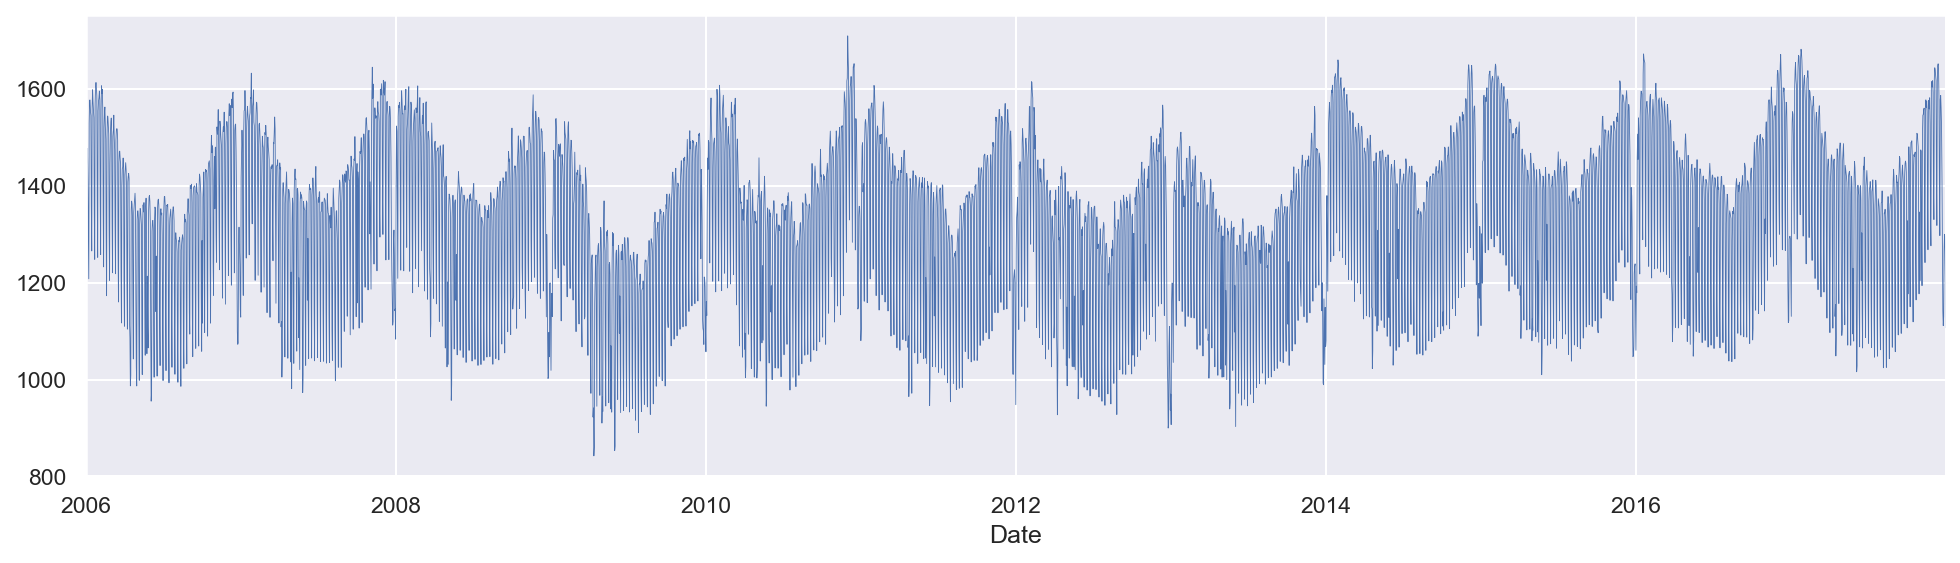

In [207]:
# Visualization for Time series analysis
sns.set_theme(rc={'figure.figsize':(16, 4)})
plt.rcParams['figure.dpi'] = 150
df['Consumption'].plot(linewidth = 0.4)
plt.show()

### `Inference:`
- Electricity consumption varies over time.
- Periodic spikes suggest seasonal trends.


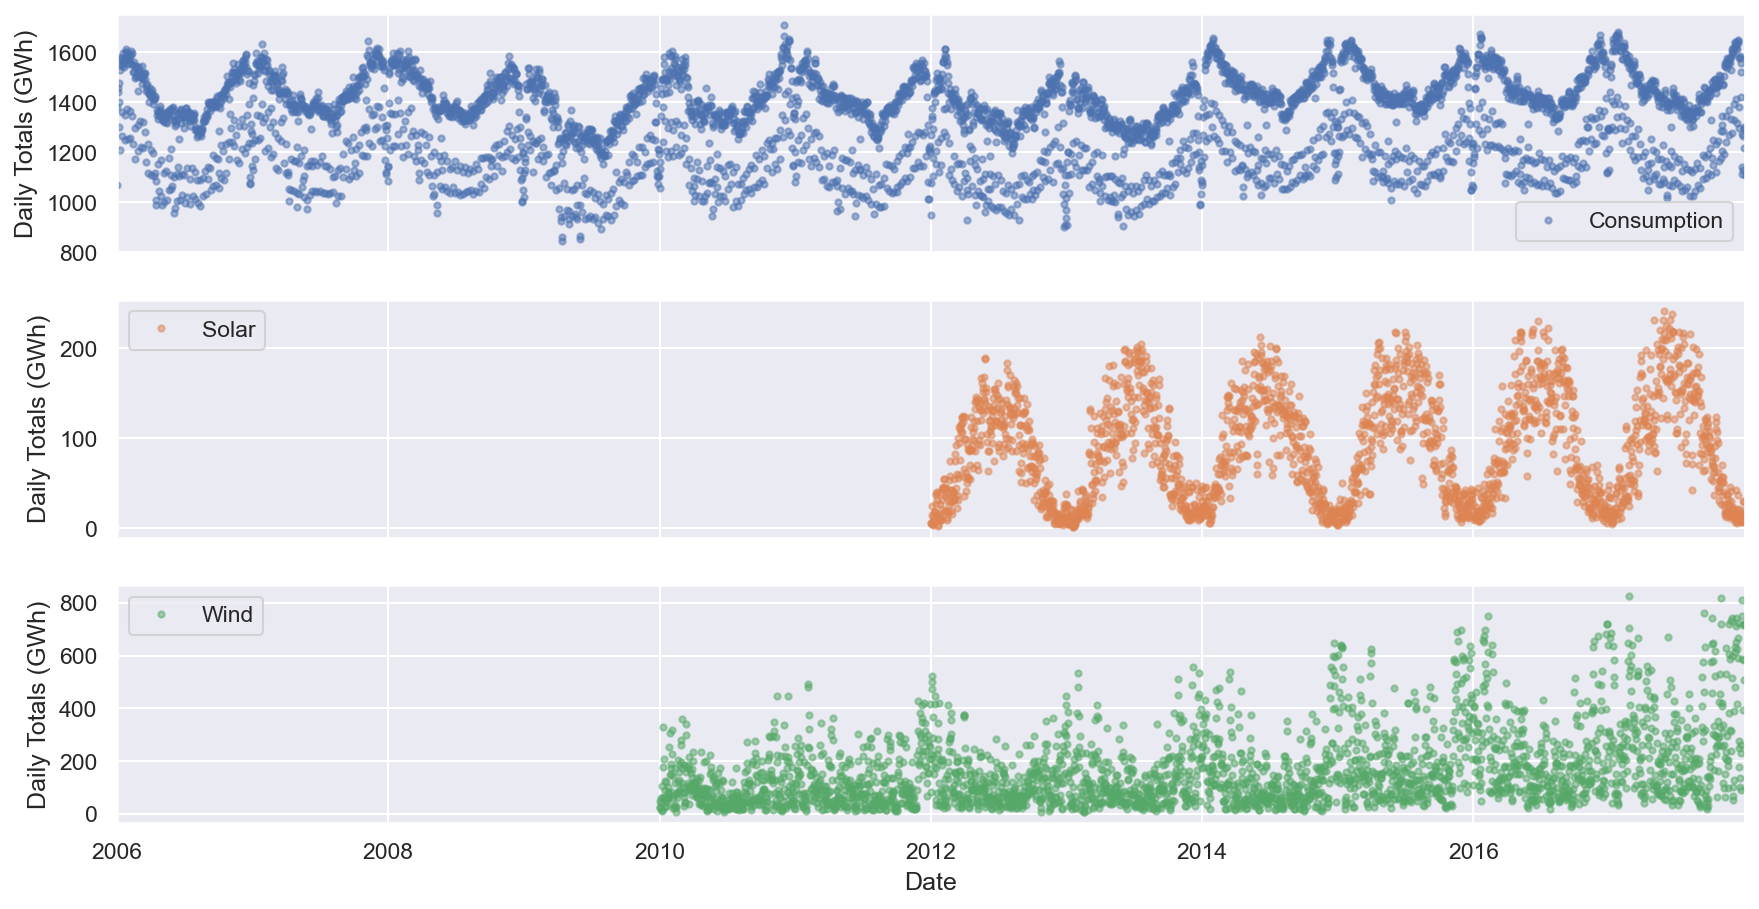

In [212]:
cols_to_plot = ['Consumption', 'Solar', 'Wind']
axes = df[cols_to_plot].plot(marker='.', alpha=0.5, linestyle='None',figsize=(14, 7), subplots=True,grid=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

### `Inference:`
- Solar power peaks in summer (more sunshine).

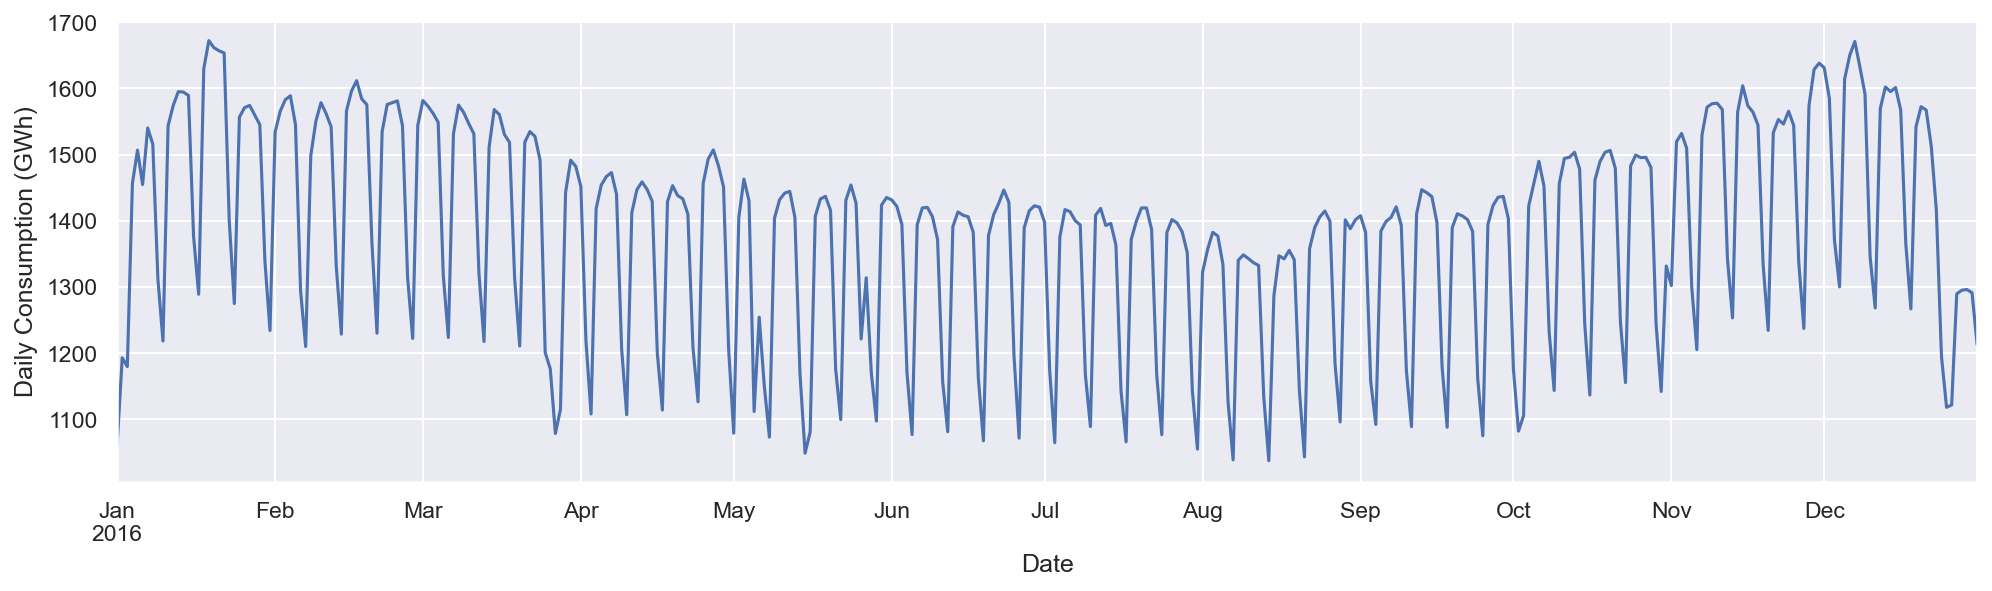

In [215]:
df.loc['2016', 'Consumption'].plot()
plt.ylabel('Daily Consumption (GWh)')
plt.show()


### `Inference:`
- Consumption of electricity is the most in winter

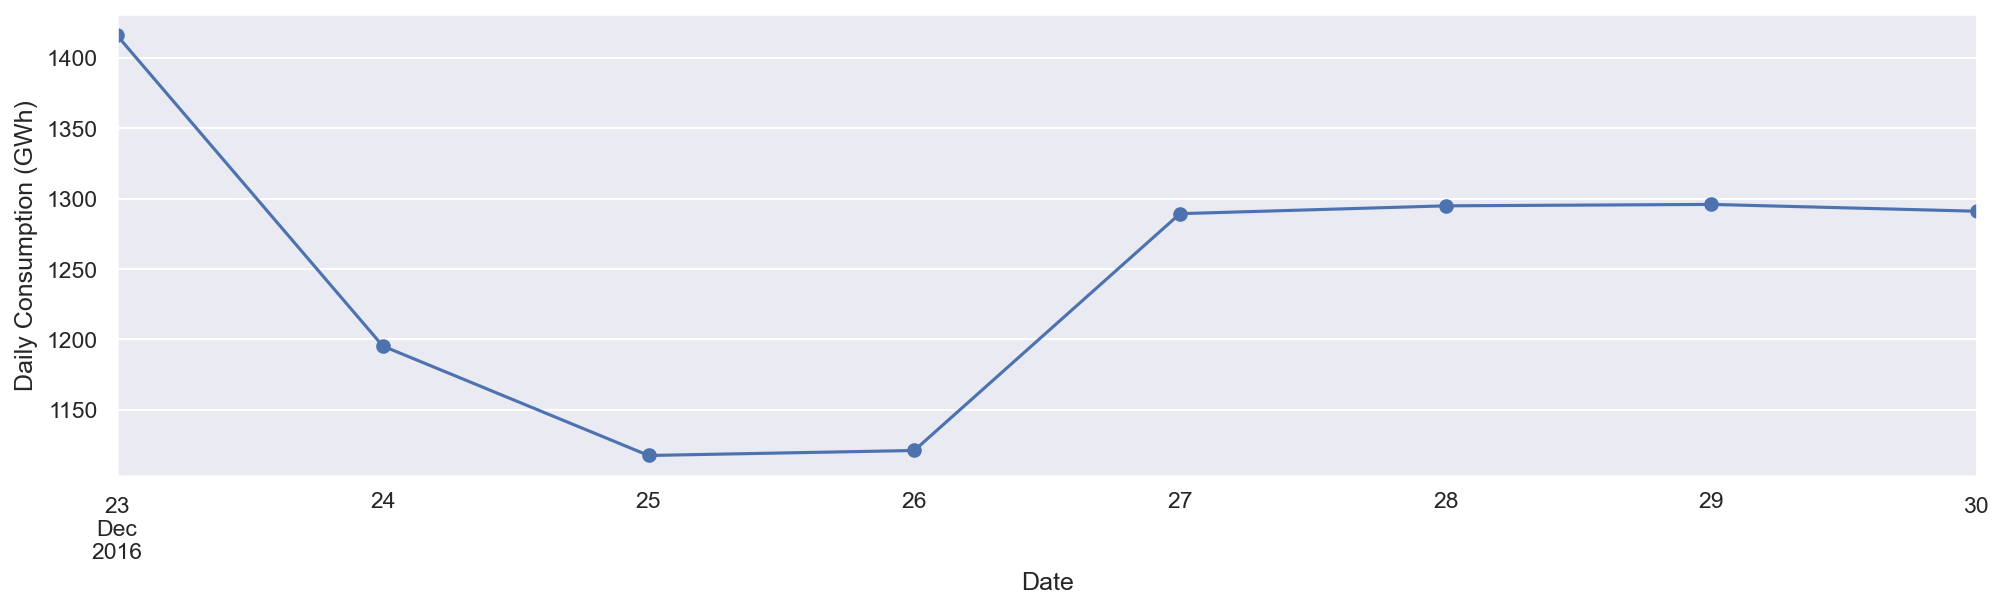

In [218]:
df.loc['2016-12-23':'2016-12-30', 'Consumption'].plot(marker='o', linestyle='-')
plt.ylabel('Daily Consumption (GWh)')
plt.show()


### `Inference:`
- shows the consumption pattern of electricity from '2016-12-23' to '2016-12-30'

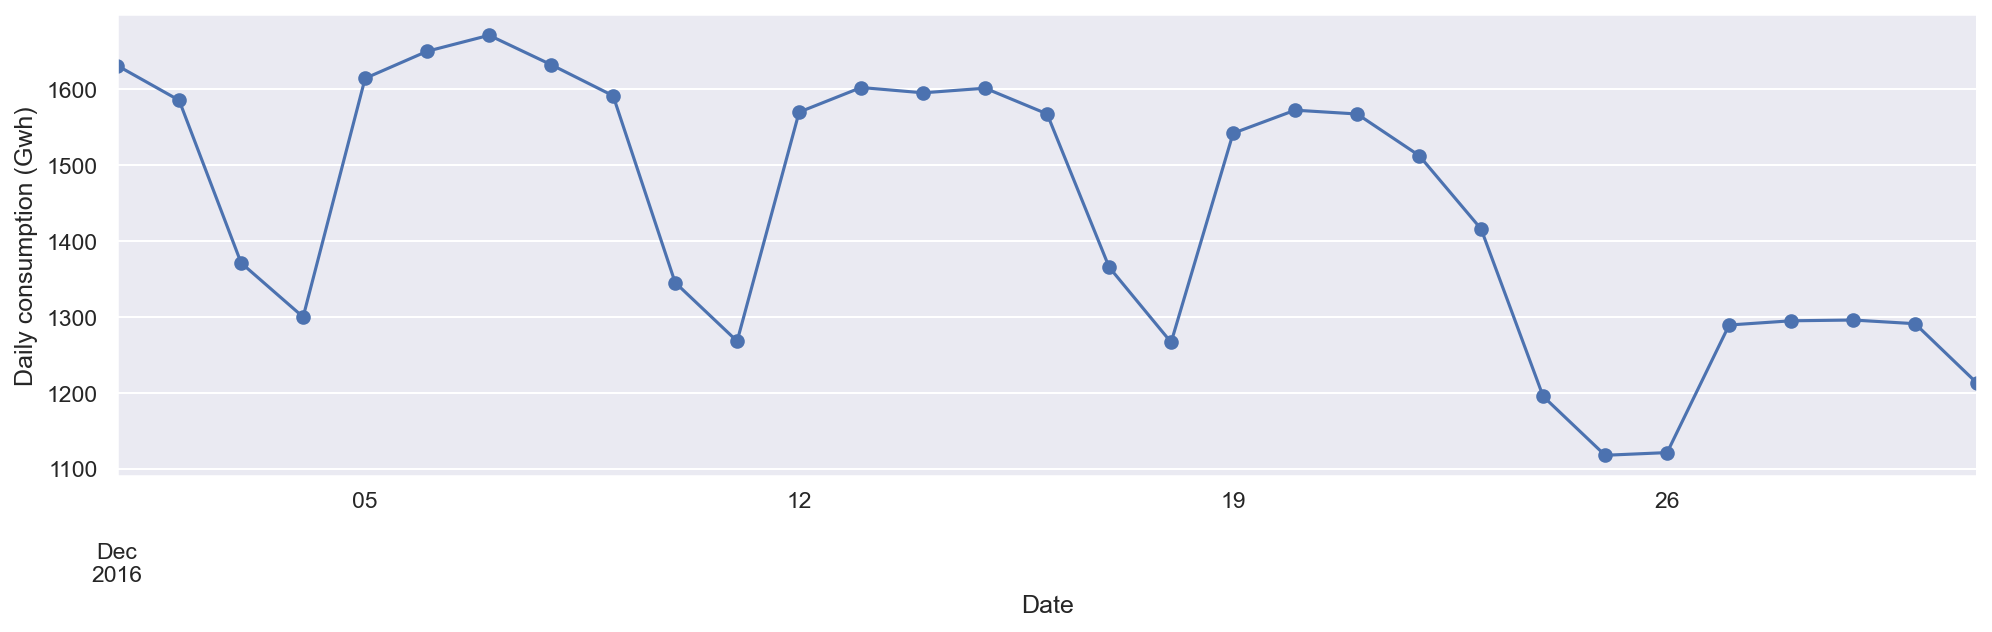

In [221]:
df.loc['2016-12','Consumption'].plot(marker = 'o', linestyle = '-')
plt.ylabel("Daily consumption (Gwh)")
plt.show()

### `Inference:`
- shows the weekly pattern of electricity consumption, indicating consumption decreases in the weekends

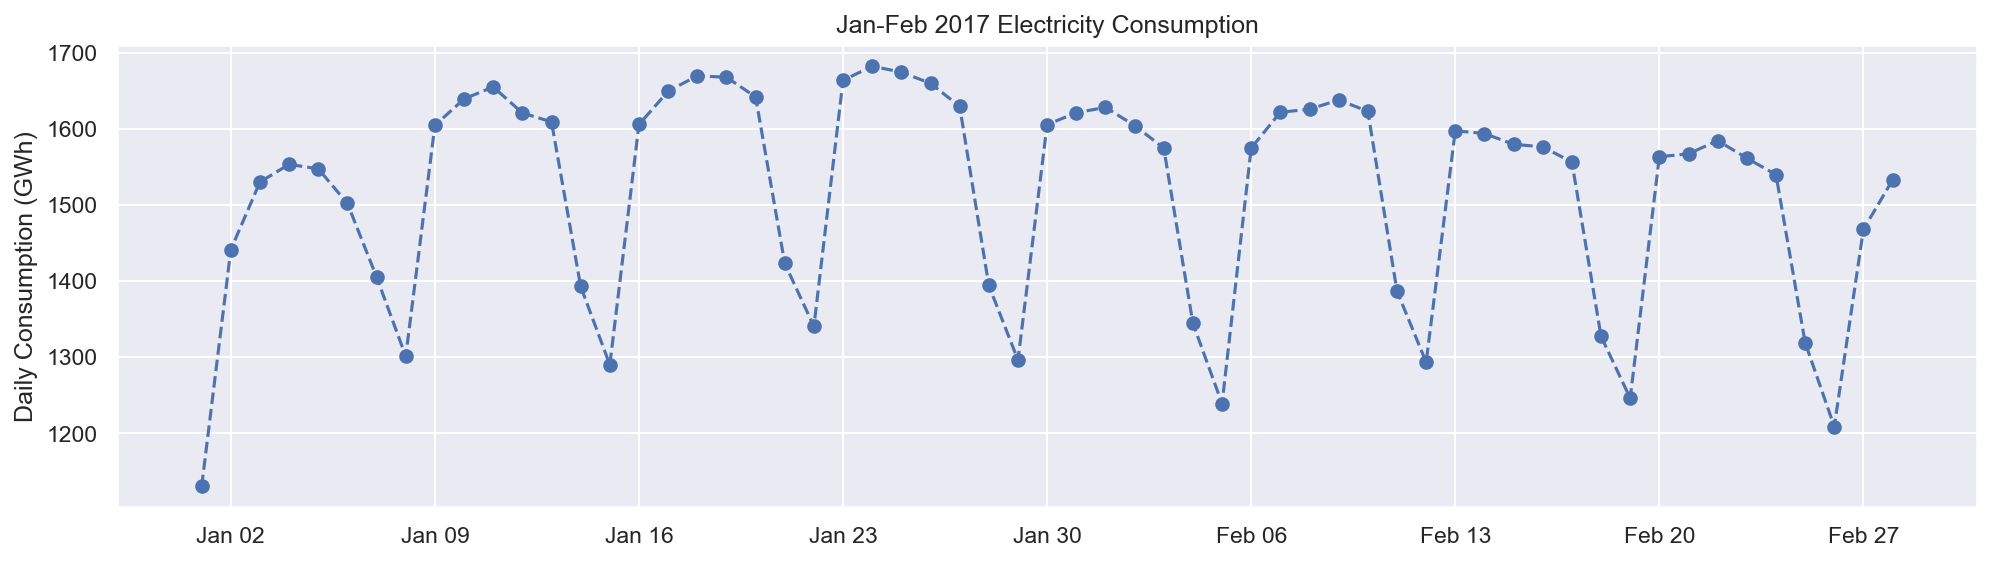

In [224]:

# import dates module from matplotlib 
import matplotlib.dates as mdates

# plot graph
fig, ax = plt.subplots()

ax.plot(df.loc['2017-01':'2017-02', 'Consumption'], marker='o', linestyle='--')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')

# to set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# to set format for x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

### `Inference:`
- Shows a smoother version of the trends by removing daily fluctuations.


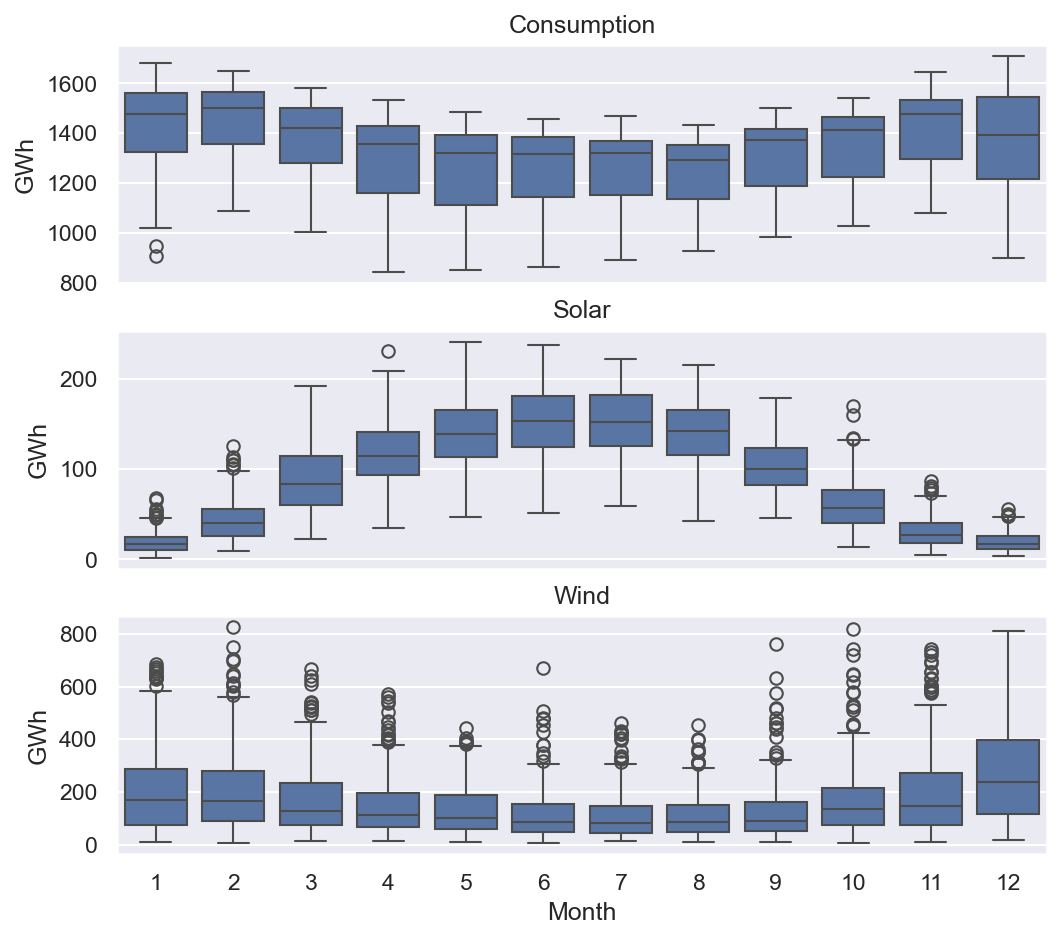

In [229]:
fig, axes = plt.subplots(3, 1, figsize=(8, 7), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
  sns.boxplot(data=df, x='Month', y=name, ax=ax)
  ax.set_ylabel('GWh')
  ax.set_title(name)
  if ax != axes[-1]:
    ax.set_xlabel('')  


### `Inference:`
- Higher consumption in winter months (possibly due to heating).
- Lower consumption in summer months.


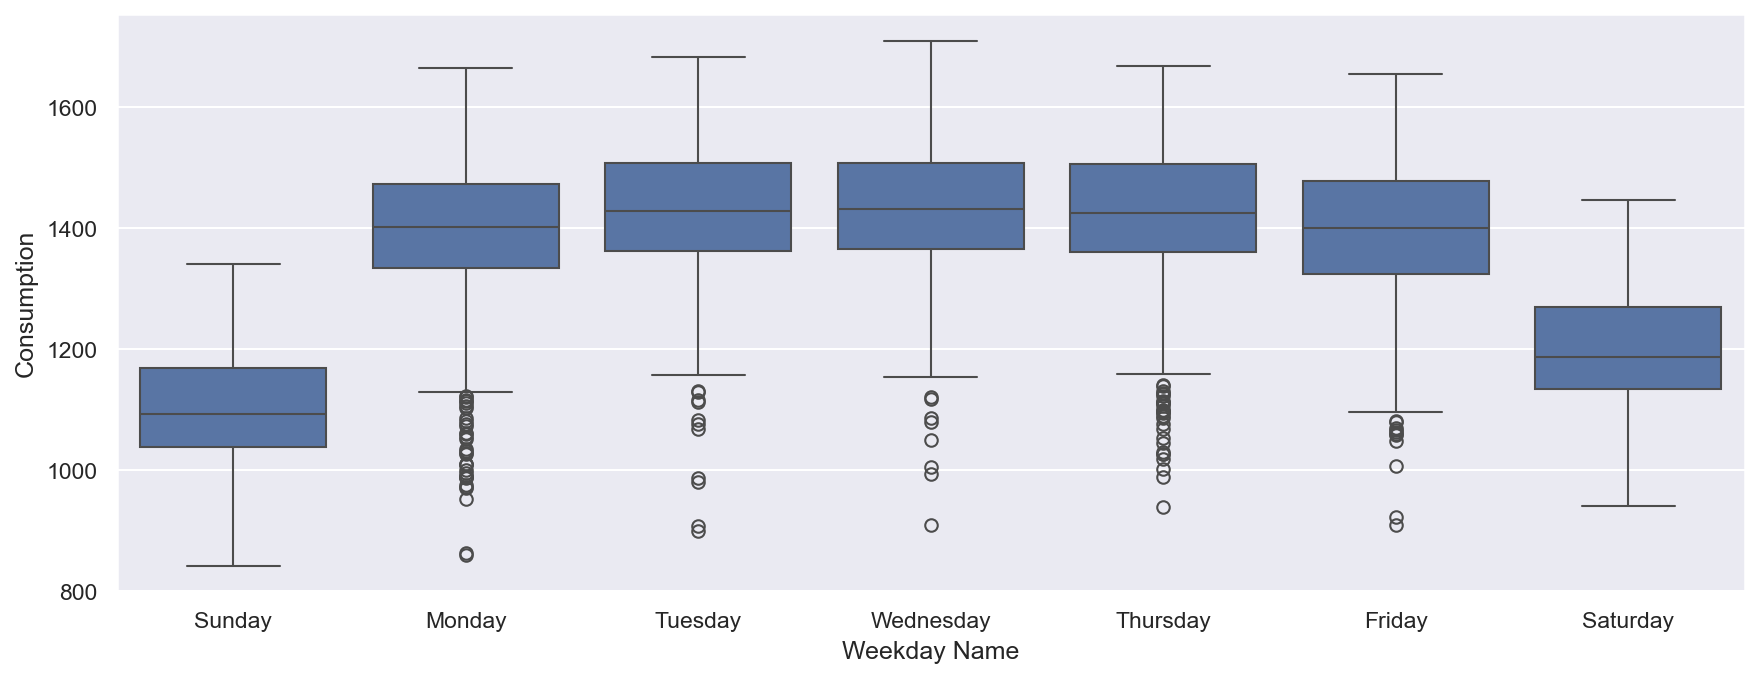

In [232]:
plt.figure(figsize=(14,5))
sns.boxplot(data=df, x='Weekday Name', y='Consumption')
plt.show()

### `Inference:`
- Consumption is lowest on the weekends

In [235]:
columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']

power_weekly_mean = df[columns].resample('W').mean()
power_weekly_mean.head(10)

Consumption  Wind  Solar  Wind+Solar
Date                                            
2006-01-01  1069.184000   NaN    NaN         NaN
2006-01-08  1381.300143   NaN    NaN         NaN
2006-01-15  1486.730286   NaN    NaN         NaN
2006-01-22  1490.031143   NaN    NaN         NaN
2006-01-29  1514.176857   NaN    NaN         NaN
2006-02-05  1501.403286   NaN    NaN         NaN
2006-02-12  1498.217143   NaN    NaN         NaN
2006-02-19  1446.507429   NaN    NaN         NaN
2006-02-26  1447.651429   NaN    NaN         NaN
2006-03-05  1439.727857   NaN    NaN         NaN

In [237]:
start, end = '2016-01', '2016-06'


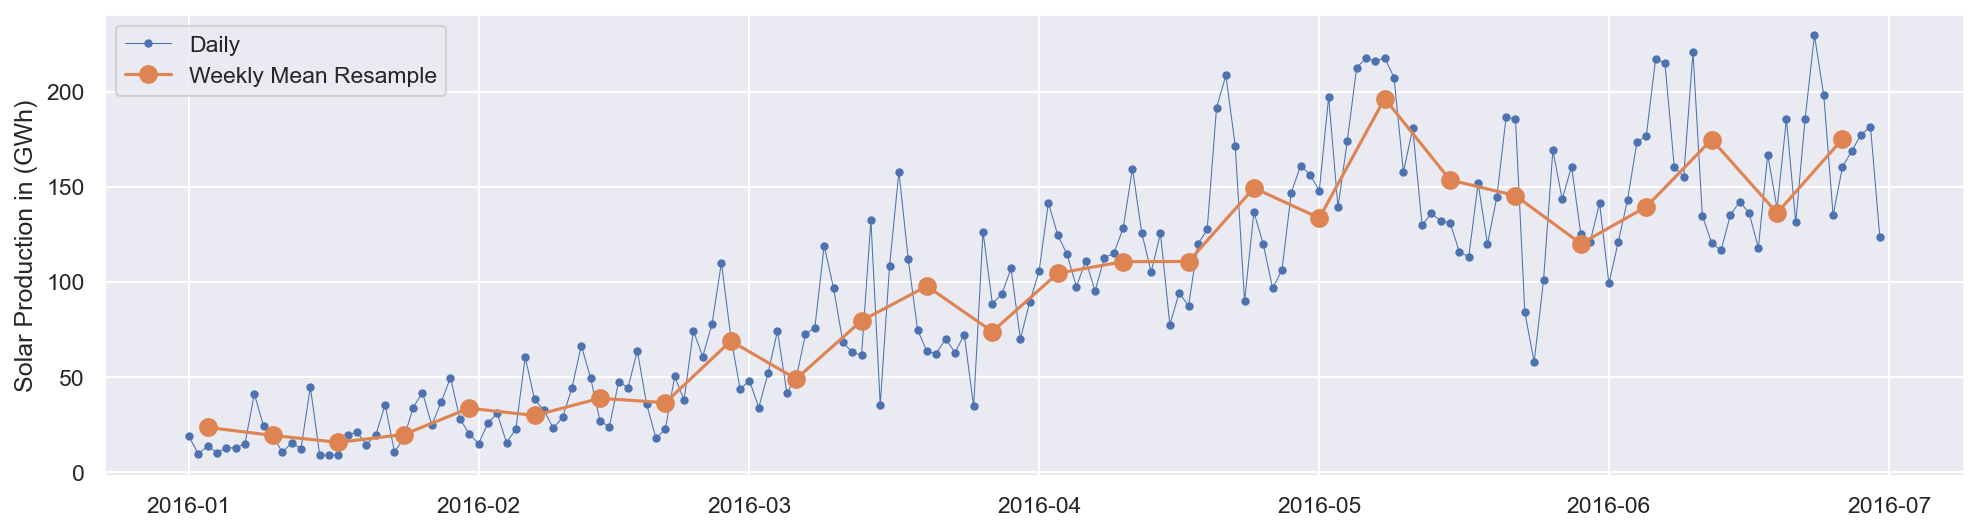

In [239]:
fig, ax = plt.subplots()

ax.plot(df.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(power_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production in (GWh)')
ax.legend()
plt.show()

### `Inference:`
- Helps in identifying trends across weeks.
- Shows that consumption has increased on an average over the weeks

# Time Series analysis on Weather Data

## Importing the dataset

In [245]:
df = pd.read_csv(r"D:\study material\VIT_Data_Science\Winter_Sem\Exploratory Data Analysis Lab\8_feb\Weather Data.csv")
df

Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0        1/1/2012 0:00    -1.8              -3.9         86                4   
1        1/1/2012 1:00    -1.8              -3.7         87                4   
2        1/1/2012 2:00    -1.8              -3.4         89                7   
3        1/1/2012 3:00    -1.5              -3.2         88                6   
4        1/1/2012 4:00    -1.5              -3.3         88                7   
...                ...     ...               ...        ...              ...   
8779  12/31/2012 19:00     0.1              -2.7         81               30   
8780  12/31/2012 20:00     0.2              -2.4         83               24   
8781  12/31/2012 21:00    -0.5              -1.5         93               28   
8782  12/31/2012 22:00    -0.2              -1.8         89               28   
8783  12/31/2012 23:00     0.0              -2.1         86               30   

      Visibility_km  Press_kPa               Weather  
0               8.0     101.24                   Fog  
1               8.0     101.24                   Fog  
2               4.0     101.26  Freezing Drizzle,Fog  
3               4.0     101.27  Freezing Drizzle,Fog  
4               4.8     101.23                   Fog  
...             ...        ...                   ...  
8779            9.7     100.13                  Snow  
8780            9.7     100.03                  Snow  
8781            4.8      99.95                  Snow  
8782            9.7      99.91                  Snow  
8783           11.3      99.89                  Snow  

[8784 rows x 8 columns]

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


## Checking for the missing values

In [250]:
df.isna().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

`Inference:`
- No missing values present in the dataset


## Checking for duplicates

In [254]:
df.duplicated().sum()

0

`Inference:`
- No duplicate values present in the dataset


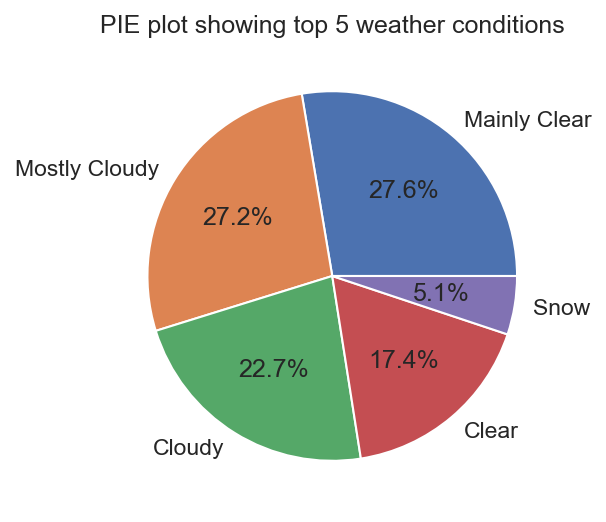

In [257]:
df['Weather'].value_counts().nlargest(5).plot(kind = 'pie',autopct='%1.1f%%')
plt.title("PIE plot showing top 5 weather conditions")
plt.ylabel("")
plt.show()

`Inference`:
- The weather is mostly either clear or cloudy followed by 5% snowy weather

C:\Users\TUFAN\AppData\Local\Temp\ipykernel_12868\2648648754.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = k,palette='viridis')


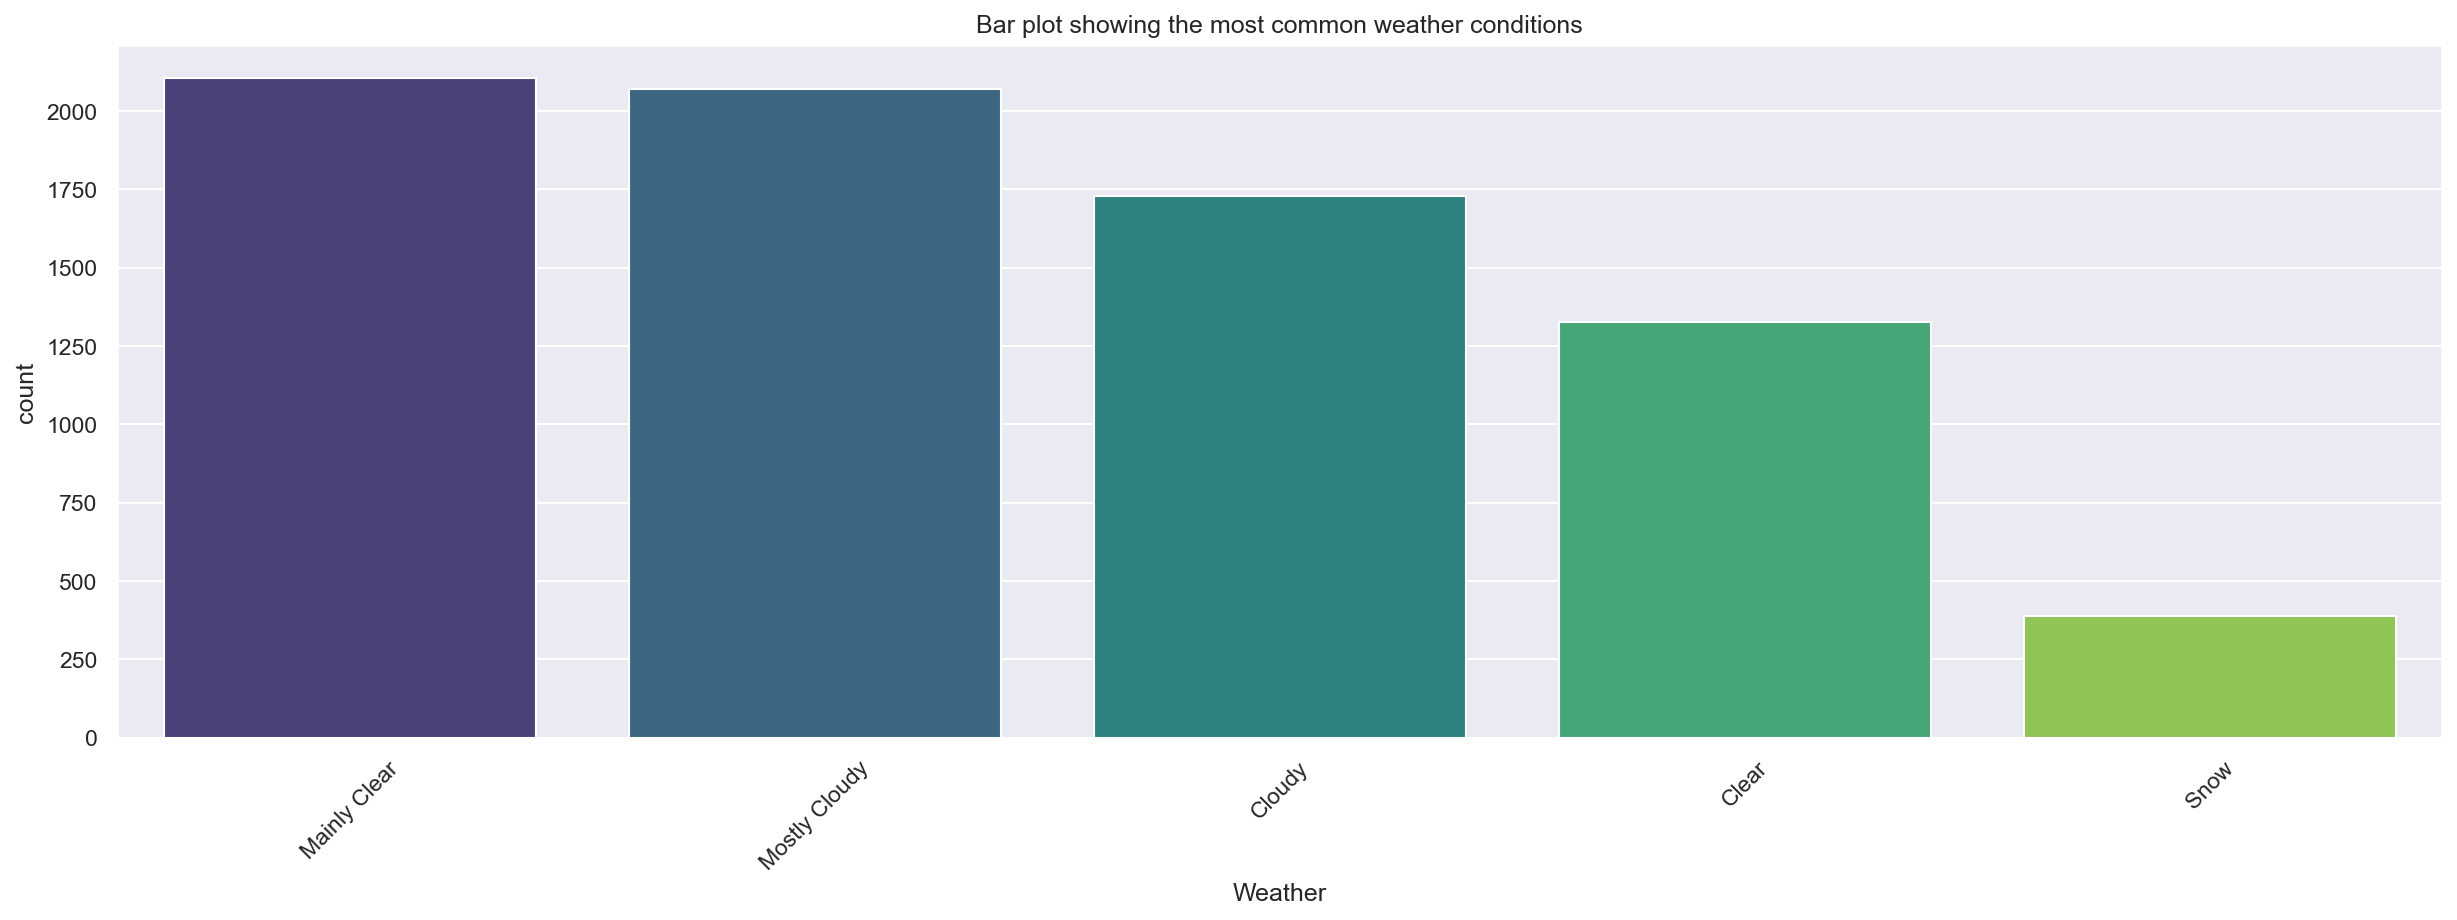

In [260]:
plt.figure(figsize=(20,6))
k = df['Weather'].value_counts().nlargest(5)
sns.barplot(data = k,palette='viridis')
plt.xticks(rotation = 45)
plt.title("Bar plot showing the most common weather conditions")
plt.show()


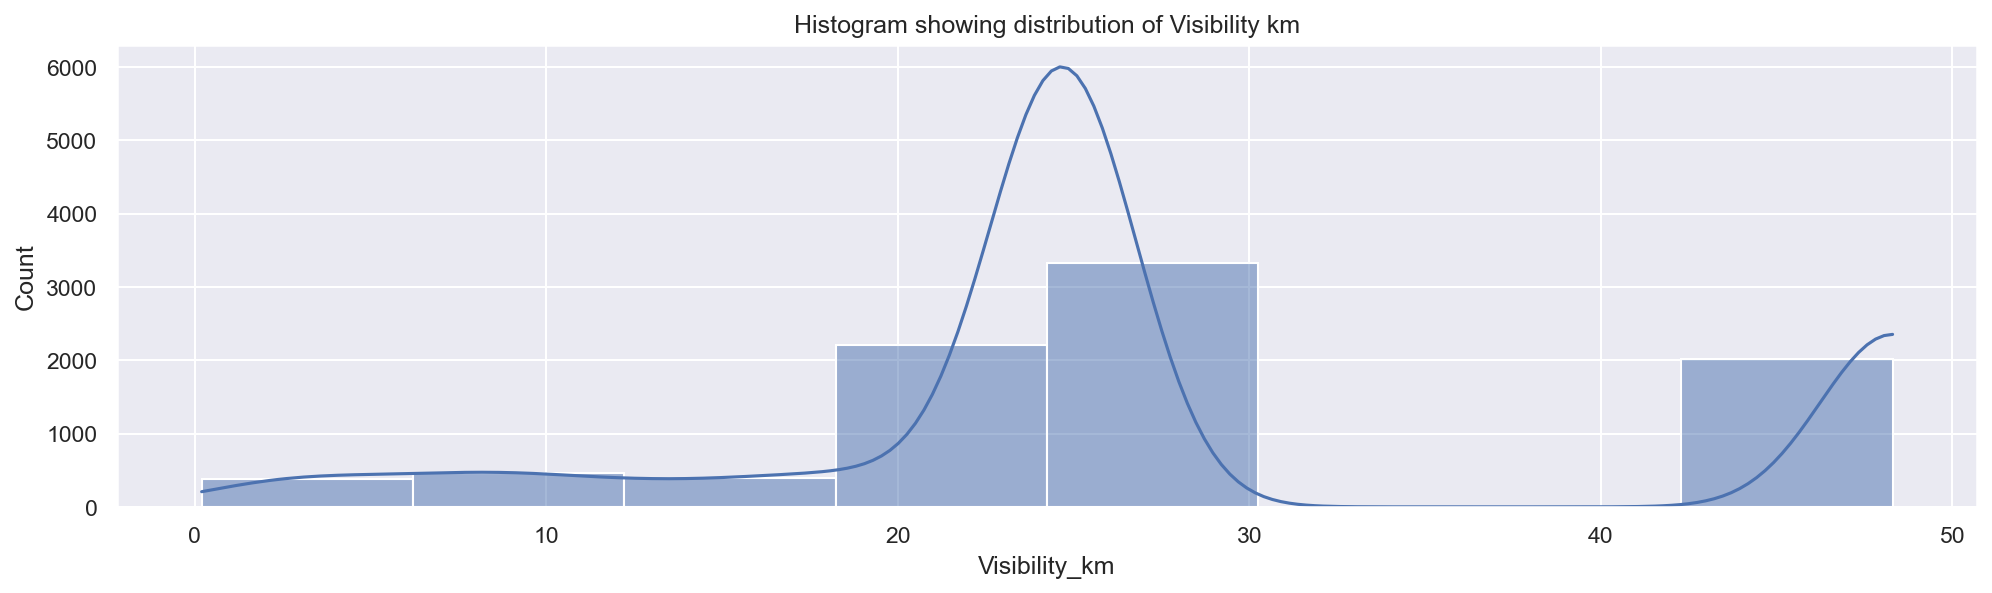

In [262]:
sns.histplot(df['Visibility_km'],kde=True,bins=8)
plt.title("Histogram showing distribution of Visibility km")
plt.show()

`Inference:`
- Most visible range is between 20-30 km

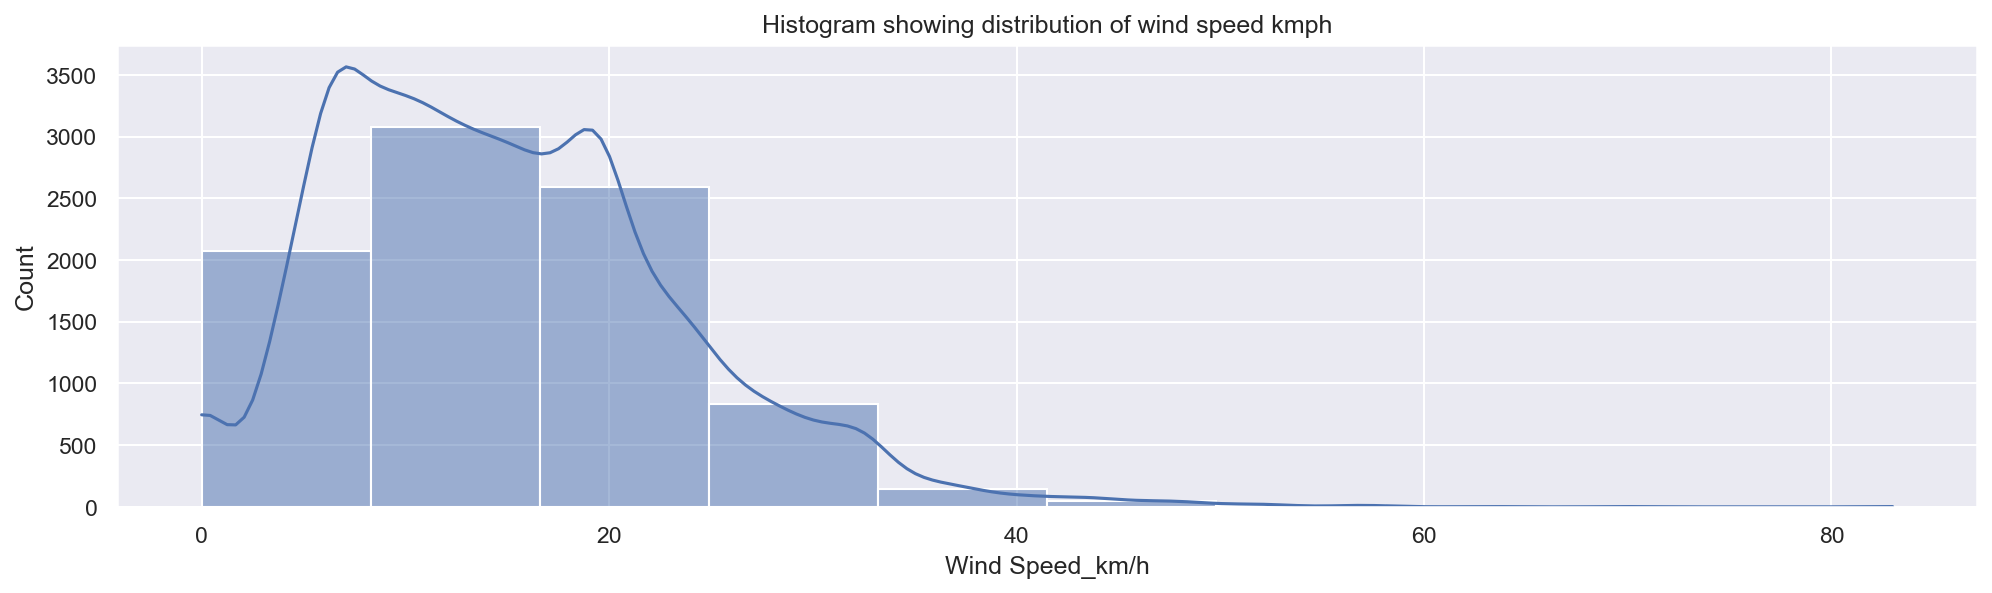

In [265]:
sns.histplot(df['Wind Speed_km/h'],kde=True,bins=10)
plt.title("Histogram showing distribution of wind speed kmph")
plt.show()

`Inference:`
- Mostly windspeed is around 8-20 kmph

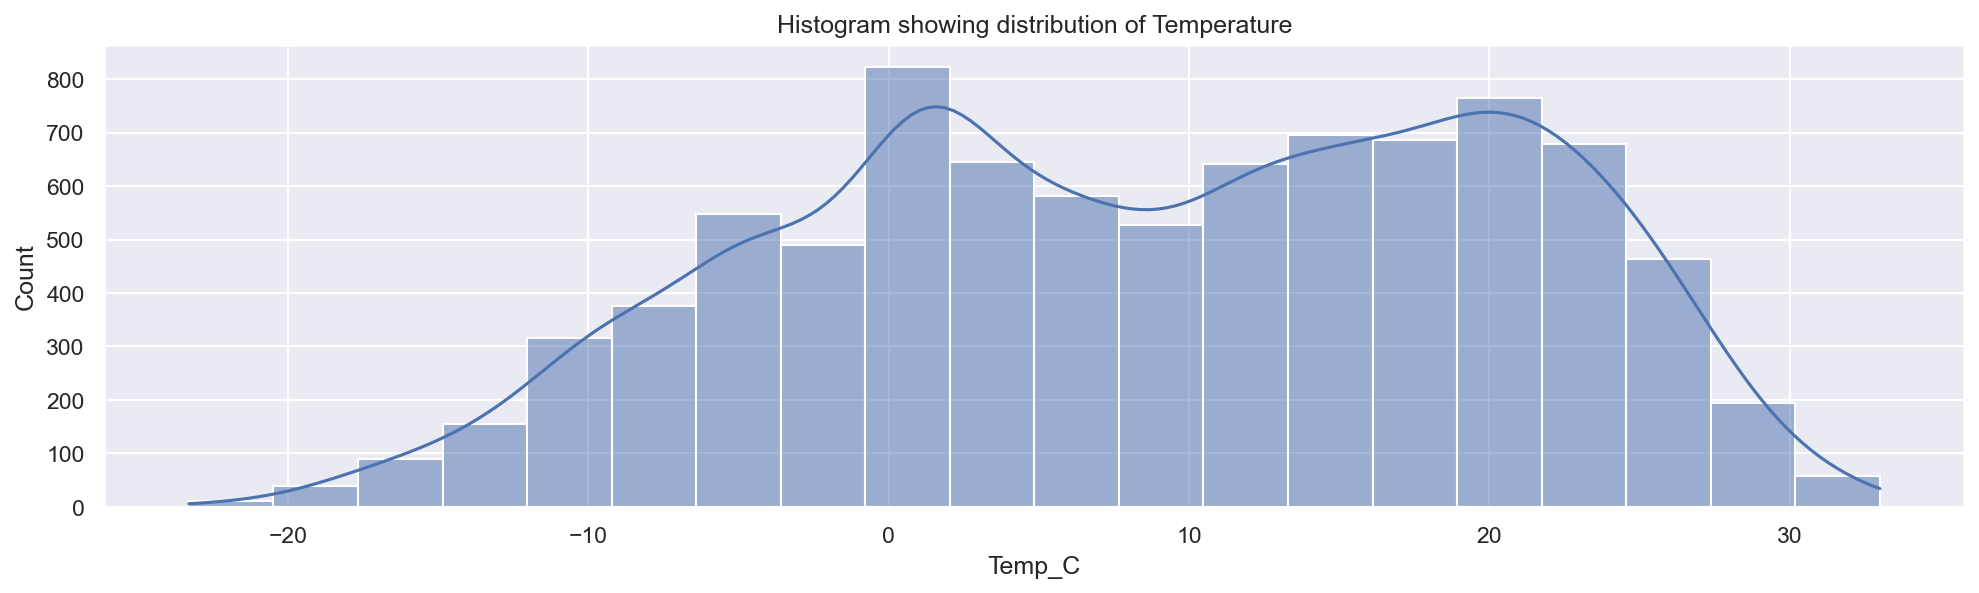

In [268]:
sns.histplot(df['Temp_C'],kde=True,bins=20)
plt.title("Histogram showing distribution of Temperature")
plt.show()

`Inference:`
- the temperature is mostly in the cooler side, -1 to 2 degree Celcius 

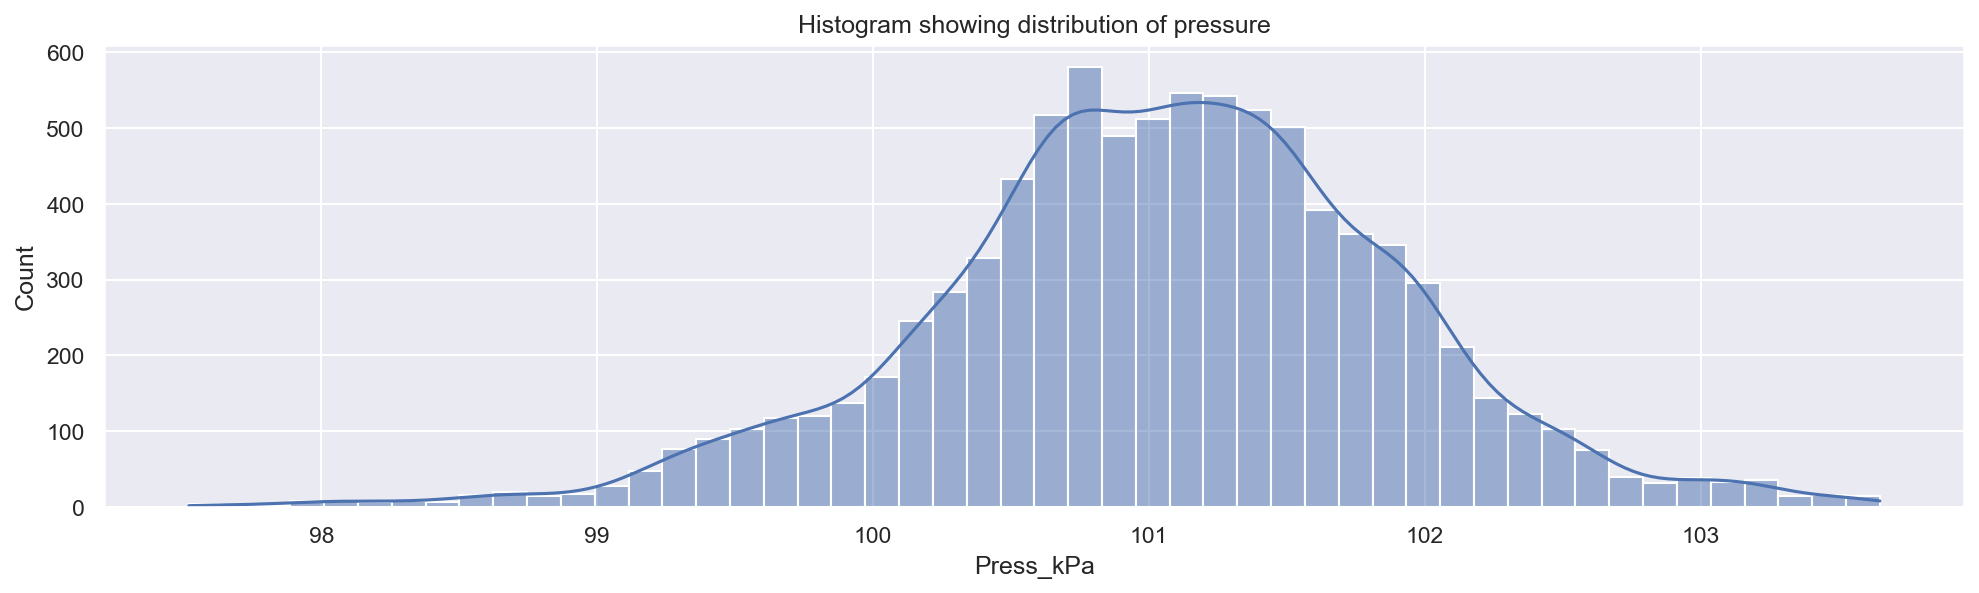

In [271]:
sns.histplot(df['Press_kPa'],kde=True,bins=50)
plt.title("Histogram showing distribution of pressure")
plt.show()

`Inference:`
- Average pressure ranges between 100-102 K pascal

In [274]:
df.corr(numeric_only='True')

Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
Temp_C            1.000000          0.932714  -0.220182        -0.061876   
Dew Point Temp_C  0.932714          1.000000   0.139494        -0.095685   
Rel Hum_%        -0.220182          0.139494   1.000000        -0.092743   
Wind Speed_km/h  -0.061876         -0.095685  -0.092743         1.000000   
Visibility_km     0.273455          0.050813  -0.633683         0.004883   
Press_kPa        -0.236389         -0.320616  -0.231424        -0.356613   

                  Visibility_km  Press_kPa  
Temp_C                 0.273455  -0.236389  
Dew Point Temp_C       0.050813  -0.320616  
Rel Hum_%             -0.633683  -0.231424  
Wind Speed_km/h        0.004883  -0.356613  
Visibility_km          1.000000   0.231847  
Press_kPa              0.231847   1.000000

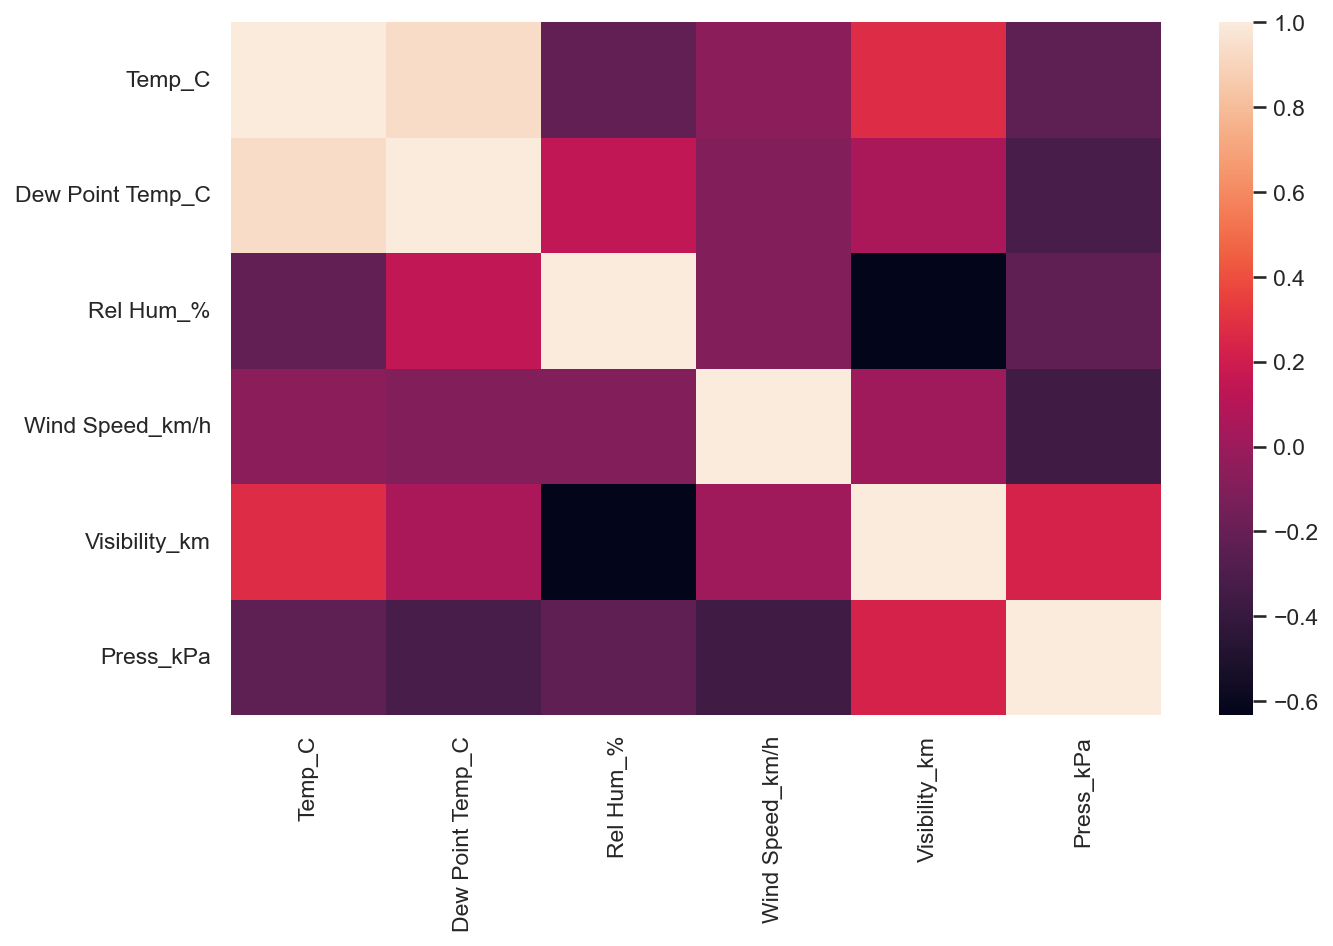

In [278]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only='True'))
plt.show()

`Inference:`
- Dew Point and temperature has a very high positive correlation 
- relative humidity and visibility has very high negative correlation

In [281]:
top_2_weather = df['Weather'].value_counts().nlargest(2).index
df_filtered = df[df['Weather'].isin(top_2_weather)]
df_filtered

Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
16      1/1/2012 16:00     2.6              -0.2         82               13   
26       1/2/2012 2:00     3.9              -0.9         71               32   
27       1/2/2012 3:00     3.7              -1.5         69               33   
28       1/2/2012 4:00     2.9              -2.3         69               32   
29       1/2/2012 5:00     2.6              -2.3         70               32   
...                ...     ...               ...        ...              ...   
8755  12/30/2012 19:00   -13.4             -16.5         77               26   
8757  12/30/2012 21:00   -13.8             -16.5         80               20   
8758  12/30/2012 22:00   -13.7             -16.3         81               19   
8759  12/30/2012 23:00   -12.1             -15.1         78               28   
8763   12/31/2012 3:00   -11.8             -14.4         81                6   

      Visibility_km  Press_kPa        Weather  
16             12.9      99.93  Mostly Cloudy  
26             25.0      99.26  Mostly Cloudy  
27             25.0      99.30  Mostly Cloudy  
28             25.0      99.26  Mostly Cloudy  
29             25.0      99.21  Mostly Cloudy  
...             ...        ...            ...  
8755           25.0     101.47   Mainly Clear  
8757           25.0     101.50   Mainly Clear  
8758           25.0     101.54   Mainly Clear  
8759           25.0     101.52  Mostly Cloudy  
8763           25.0     101.42  Mostly Cloudy  

[4175 rows x 8 columns]

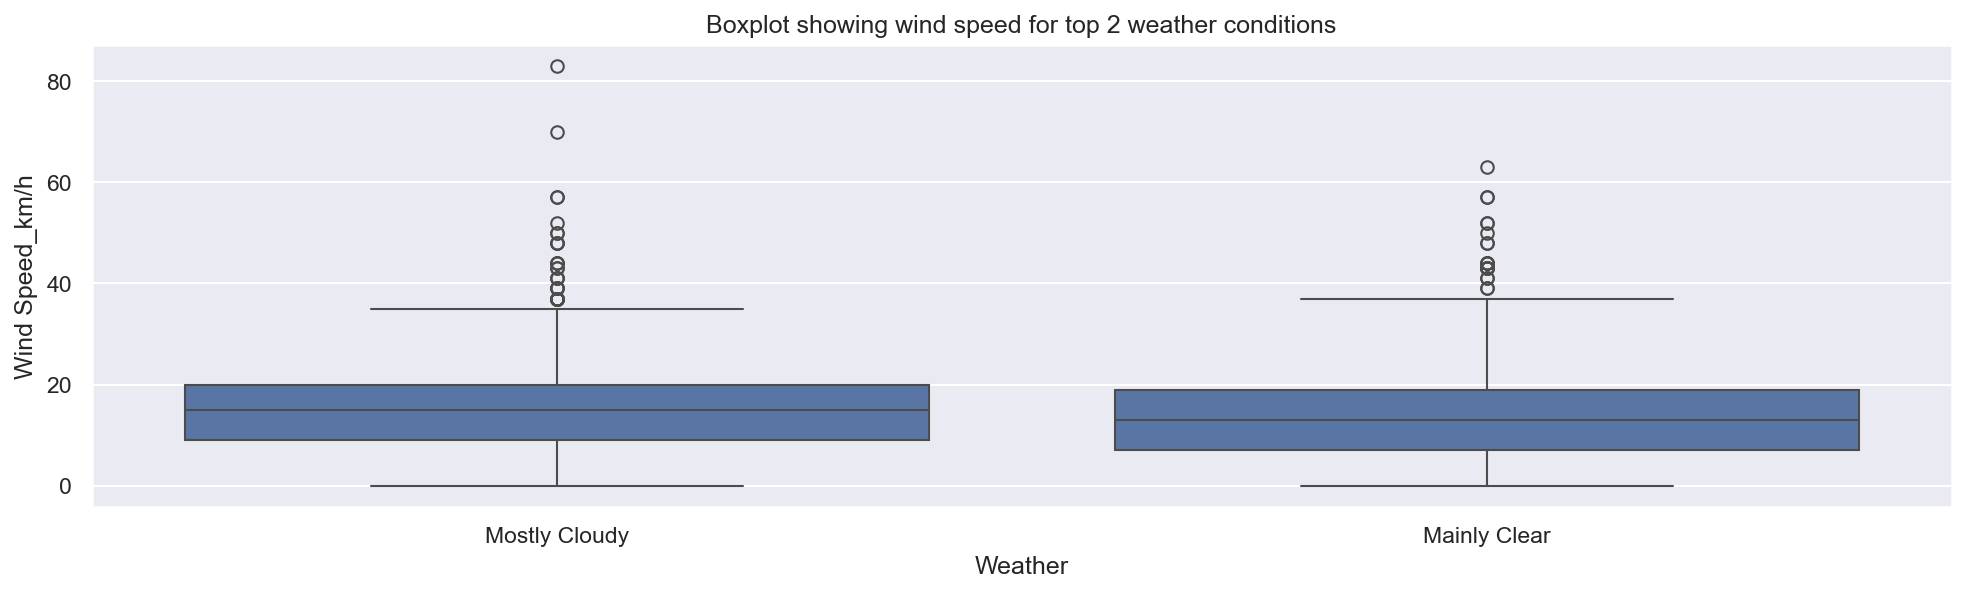

In [283]:
sns.boxplot(x='Weather', y = 'Wind Speed_km/h', data = df_filtered)
plt.title("Boxplot showing wind speed for top 2 weather conditions")
plt.show()

## `Inference:`
- average windspeed ins around 10-20 kmph with some outliers in both the weather

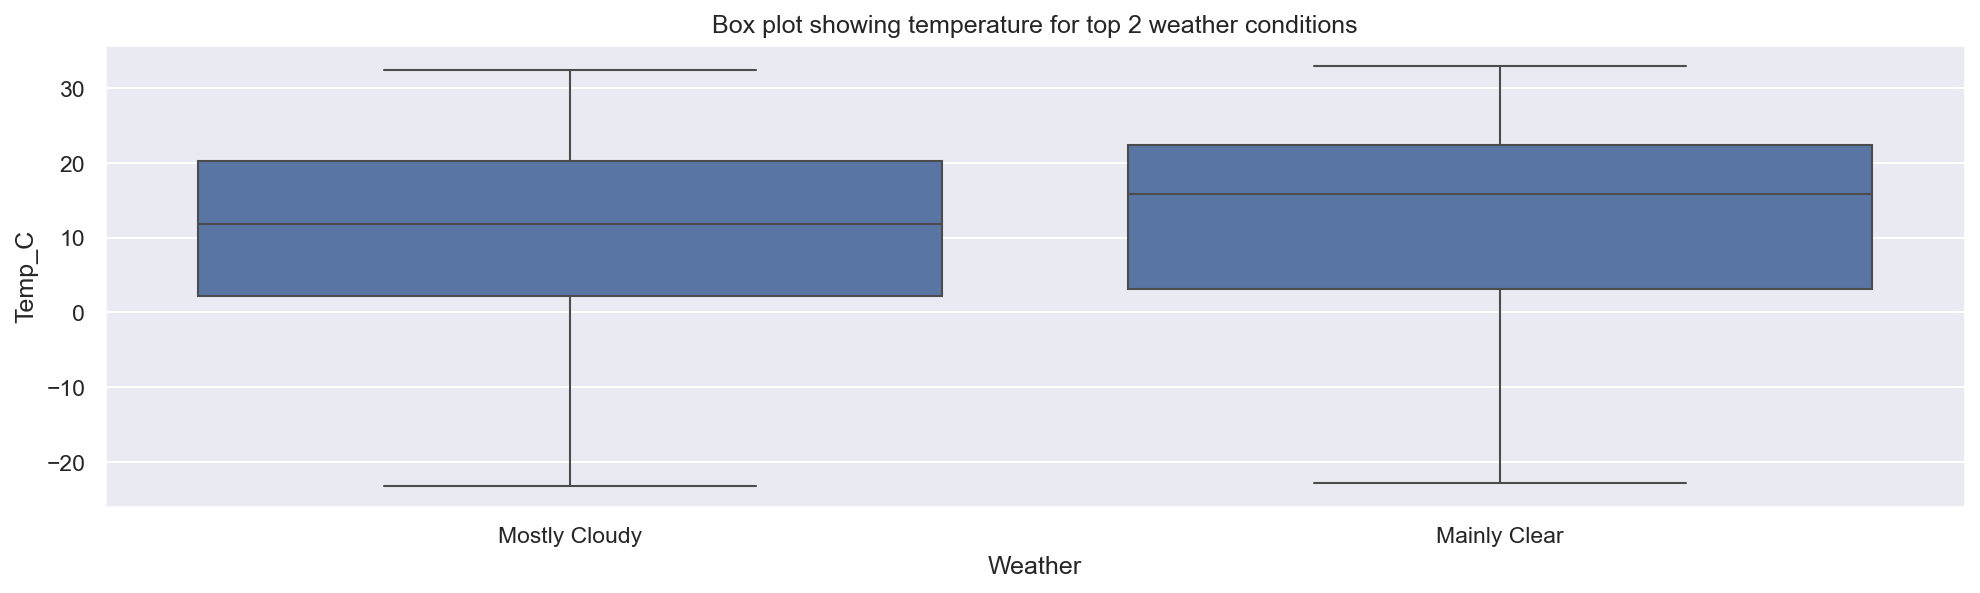

In [286]:
sns.boxplot(x='Weather', y = 'Temp_C', data = df_filtered)
plt.title("Box plot showing temperature for top 2 weather conditions")
plt.show()

## `Inference:`
This box plot shows average weather in both the weather condition ranges between 1 to 20 degrees celsius

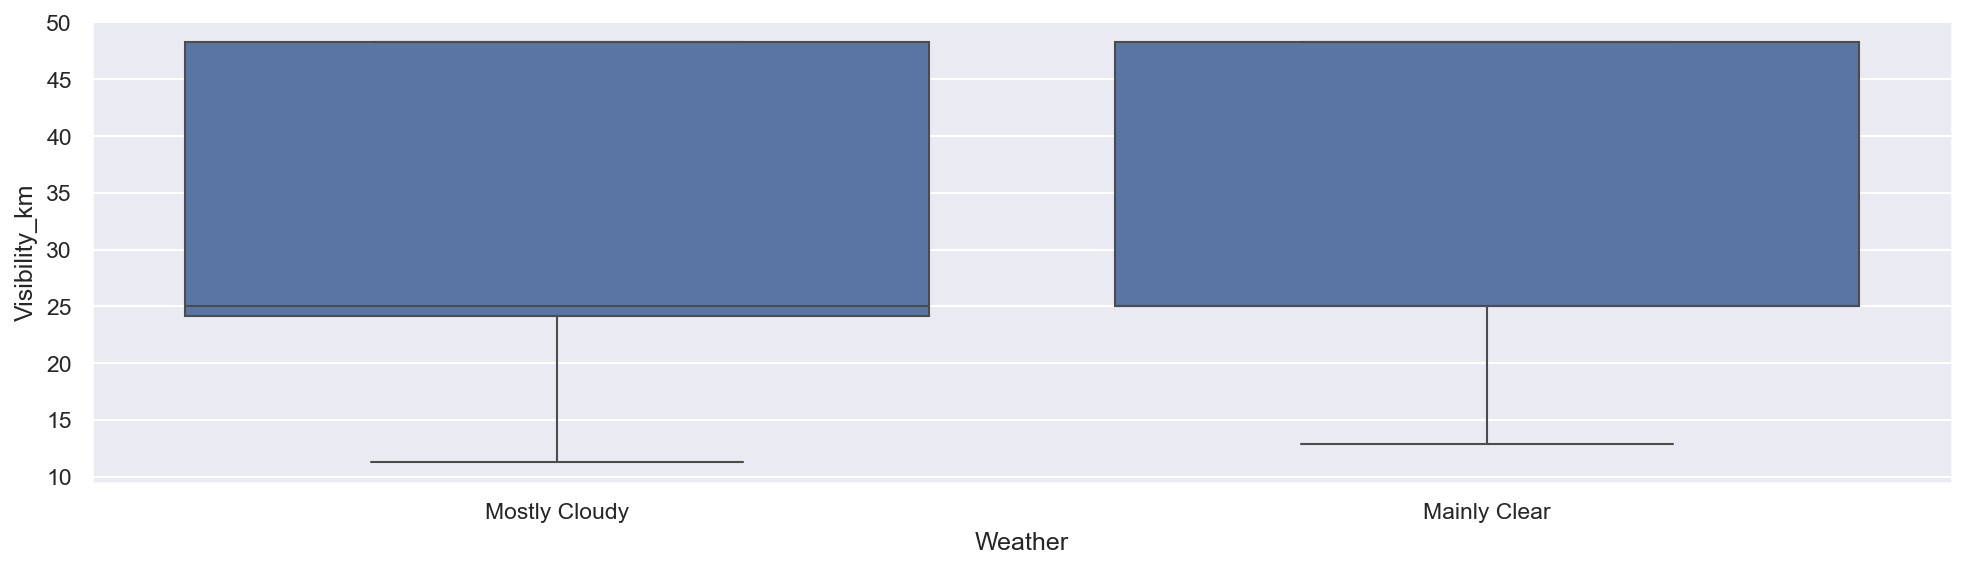

In [289]:
sns.boxplot(x='Weather', y = 'Visibility_km', data = df_filtered)
plt.show()

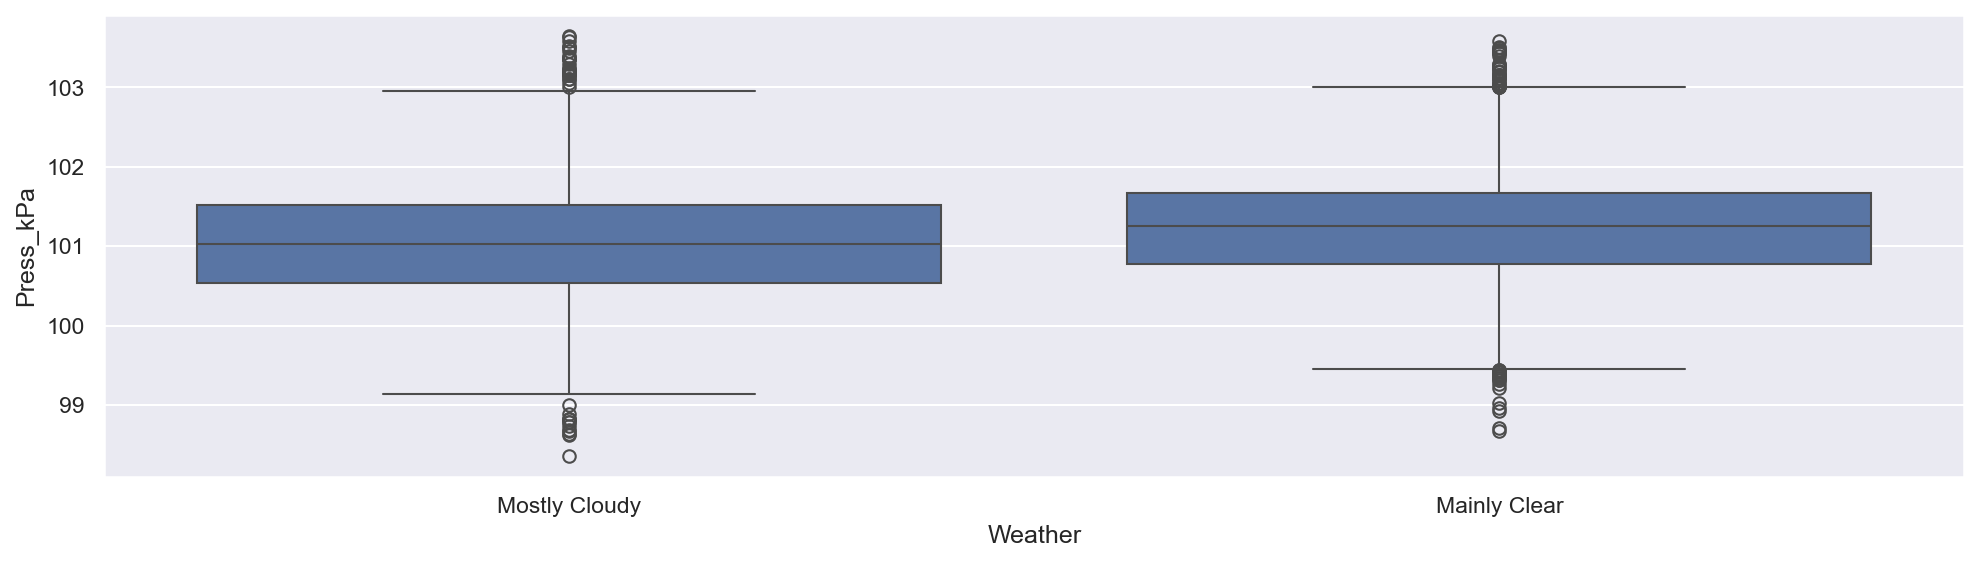

In [291]:
sns.boxplot(x='Weather', y = 'Press_kPa', data = df_filtered)
plt.show()

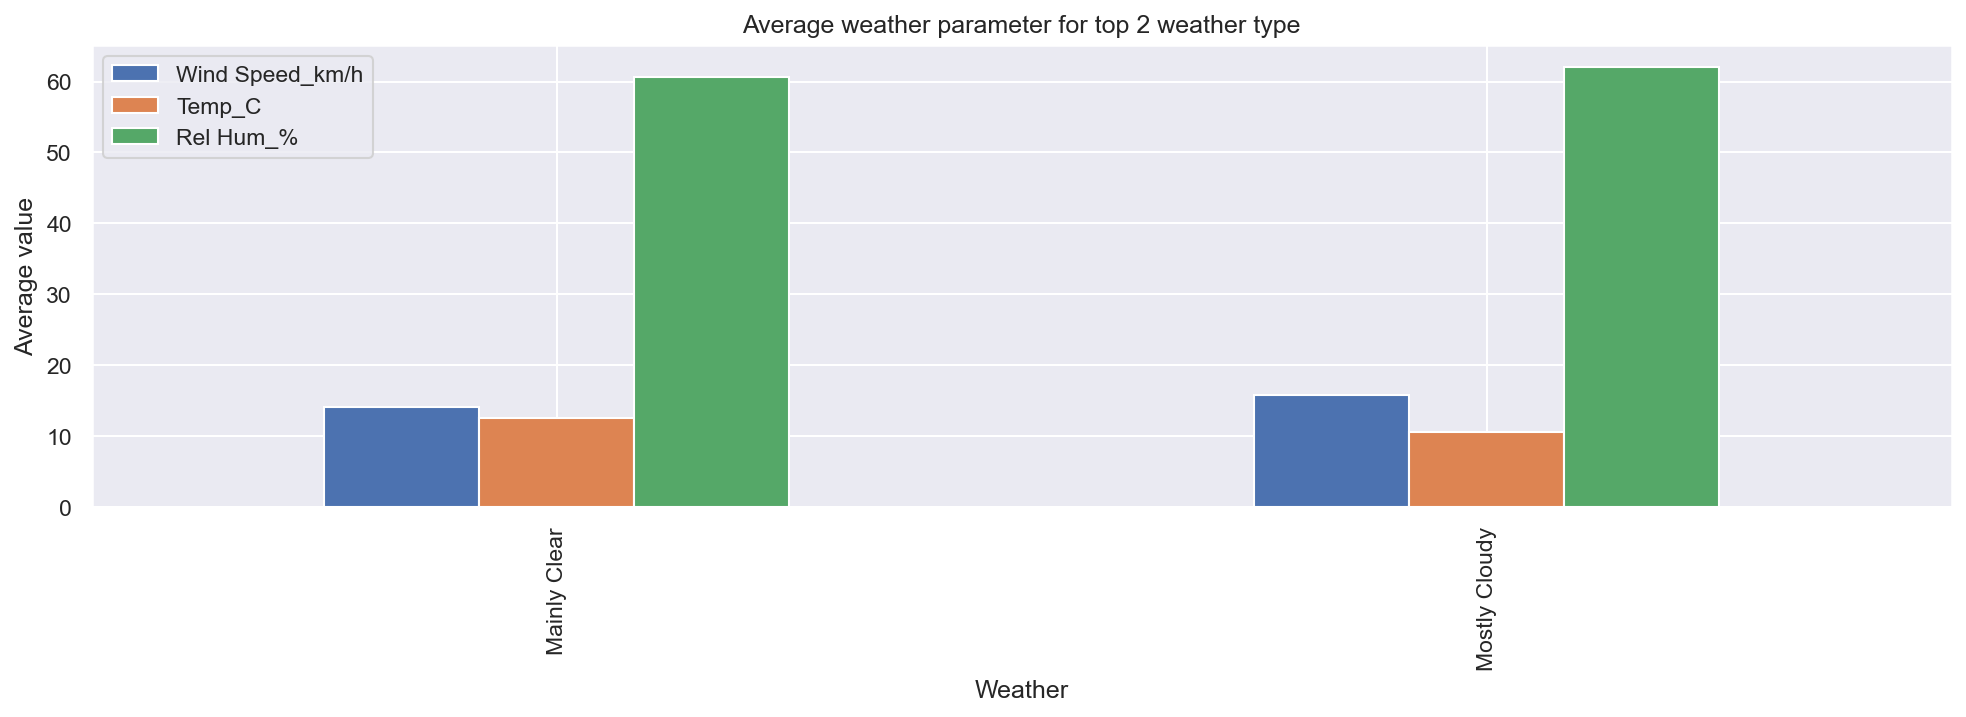

In [293]:
df_grouped = df_filtered.groupby('Weather')[['Wind Speed_km/h','Temp_C','Rel Hum_%']].mean()
df_grouped.plot(kind = 'bar')
plt.title("Average weather parameter for top 2 weather type")
plt.ylabel("Average value")
plt.show()

## `Inference:`
- on a cloudy day the temperature is lesser and the wind speed is more

### Grouping by Weather Condition & Computing Summary Statistics

In [297]:
df.groupby('Weather')[['Temp_C', 'Wind Speed_km/h', 'Rel Hum_%', 'Press_kPa']].agg(['mean', 'median', 'std'])

Temp_C                    \
                                              mean median        std   
Weather                                                                
Clear                                     6.825716   7.50  12.132015   
Cloudy                                    7.970544   7.35  11.000283   
Drizzle                                   7.353659   5.40   5.297126   
Drizzle,Fog                               8.067500   9.15   4.970286   
Drizzle,Ice Pellets,Fog                   0.400000   0.40        NaN   
Drizzle,Snow                              1.050000   1.05   0.212132   
Drizzle,Snow,Fog                          0.693333   0.60   0.317280   
Fog                                       4.303333   2.65   8.038802   
Freezing Drizzle                         -5.657143  -5.50   2.024728   
Freezing Drizzle,Fog                     -2.533333  -1.85   2.122891   
Freezing Drizzle,Haze                    -5.433333  -5.50   0.404145   
Freezing Drizzle,Snow                    -5.109091  -4.40   1.705552   
Freezing Fog                             -7.575000  -5.60   9.214255   
Freezing Rain                            -3.885714  -4.80   2.112183   
Freezing Rain,Fog                        -2.225000  -1.45   2.772935   
Freezing Rain,Haze                       -4.900000  -4.90   0.000000   
Freezing Rain,Ice Pellets,Fog            -2.600000  -2.60        NaN   
Freezing Rain,Snow Grains                -5.000000  -5.00        NaN   
Haze                                     -0.200000  -0.25   6.292535   
Mainly Clear                             12.558927  15.80  12.348807   
Moderate Rain,Fog                         1.700000   1.70        NaN   
Moderate Snow                            -5.525000  -5.45   0.613052   
Moderate Snow,Blowing Snow               -5.450000  -5.45   0.070711   
Mostly Cloudy                            10.574287  11.80  11.312839   
Rain                                      9.786275   8.90   6.404164   
Rain Showers                             13.722340  14.95   6.977575   
Rain Showers,Fog                         12.800000  12.80        NaN   
Rain Showers,Snow Showers                 2.150000   2.15   0.070711   
Rain,Fog                                  8.273276   7.90   6.037209   
Rain,Haze                                 4.633333   4.40   0.776745   
Rain,Ice Pellets                          0.600000   0.60        NaN   
Rain,Snow                                 1.055556   1.05   0.279121   
Rain,Snow Grains                          1.900000   1.90        NaN   
Rain,Snow,Fog                             0.800000   0.80        NaN   
Rain,Snow,Ice Pellets                     1.100000   1.10   0.163299   
Snow                                     -4.524103  -4.80   4.155435   
Snow Pellets                              0.700000   0.70        NaN   
Snow Showers                             -3.506667  -3.70   4.322776   
Snow Showers,Fog                        -10.675000 -10.70   0.556028   
Snow,Blowing Snow                        -5.410526  -5.00   2.854995   
Snow,Fog                                 -5.075676  -7.40   4.668714   
Snow,Haze                                -4.020000  -4.00   0.294958   
Snow,Ice Pellets                         -1.883333  -2.55   2.017341   
Thunderstorms                            24.150000  24.15   3.606245   
Thunderstorms,Heavy Rain Showers         10.900000  10.90        NaN   
Thunderstorms,Moderate Rain Showers,Fog  19.600000  19.60        NaN   
Thunderstorms,Rain                       20.433333  20.60   0.960902   
Thunderstorms,Rain Showers               20.037500  20.85   4.203947   
Thunderstorms,Rain Showers,Fog           21.600000  22.40   1.835756   
Thunderstorms,Rain,Fog                   20.600000  20.60        NaN   

                                        Wind Speed_km/h                    \
                                                   mean median        std   
Weather                                                                  

## Converting Date/Time column to DateTime format

In [300]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [302]:
df['Year'] = df['Date/Time'].dt.year
df['Month'] = df['Date/Time'].dt.month
df['Day'] = df['Date/Time'].dt.day
df['Weekday'] = df['Date/Time'].dt.day_name()
df['Hour'] = df['Date/Time'].dt.hour
df['Minute'] = df['Date/Time'].dt.minute
df['Second'] = df['Date/Time'].dt.second

df

Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  \
0    2012-01-01 00:00:00    -1.8              -3.9         86   
1    2012-01-01 01:00:00    -1.8              -3.7         87   
2    2012-01-01 02:00:00    -1.8              -3.4         89   
3    2012-01-01 03:00:00    -1.5              -3.2         88   
4    2012-01-01 04:00:00    -1.5              -3.3         88   
...                  ...     ...               ...        ...   
8779 2012-12-31 19:00:00     0.1              -2.7         81   
8780 2012-12-31 20:00:00     0.2              -2.4         83   
8781 2012-12-31 21:00:00    -0.5              -1.5         93   
8782 2012-12-31 22:00:00    -0.2              -1.8         89   
8783 2012-12-31 23:00:00     0.0              -2.1         86   

      Wind Speed_km/h  Visibility_km  Press_kPa               Weather  Year  \
0                   4            8.0     101.24                   Fog  2012   
1                   4            8.0     101.24                   Fog  2012   
2                   7            4.0     101.26  Freezing Drizzle,Fog  2012   
3                   6            4.0     101.27  Freezing Drizzle,Fog  2012   
4                   7            4.8     101.23                   Fog  2012   
...               ...            ...        ...                   ...   ...   
8779               30            9.7     100.13                  Snow  2012   
8780               24            9.7     100.03                  Snow  2012   
8781               28            4.8      99.95                  Snow  2012   
8782               28            9.7      99.91                  Snow  2012   
8783               30           11.3      99.89                  Snow  2012   

      Month  Day Weekday  Hour  Minute  Second  
0         1    1  Sunday     0       0       0  
1         1    1  Sunday     1       0       0  
2         1    1  Sunday     2       0       0  
3         1    1  Sunday     3       0       0  
4         1    1  Sunday     4       0       0  
...     ...  ...     ...   ...     ...     ...  
8779     12   31  Monday    19       0       0  
8780     12   31  Monday    20       0       0  
8781     12   31  Monday    21       0       0  
8782     12   31  Monday    22       0       0  
8783     12   31  Monday    23       0       0  

[8784 rows x 15 columns]

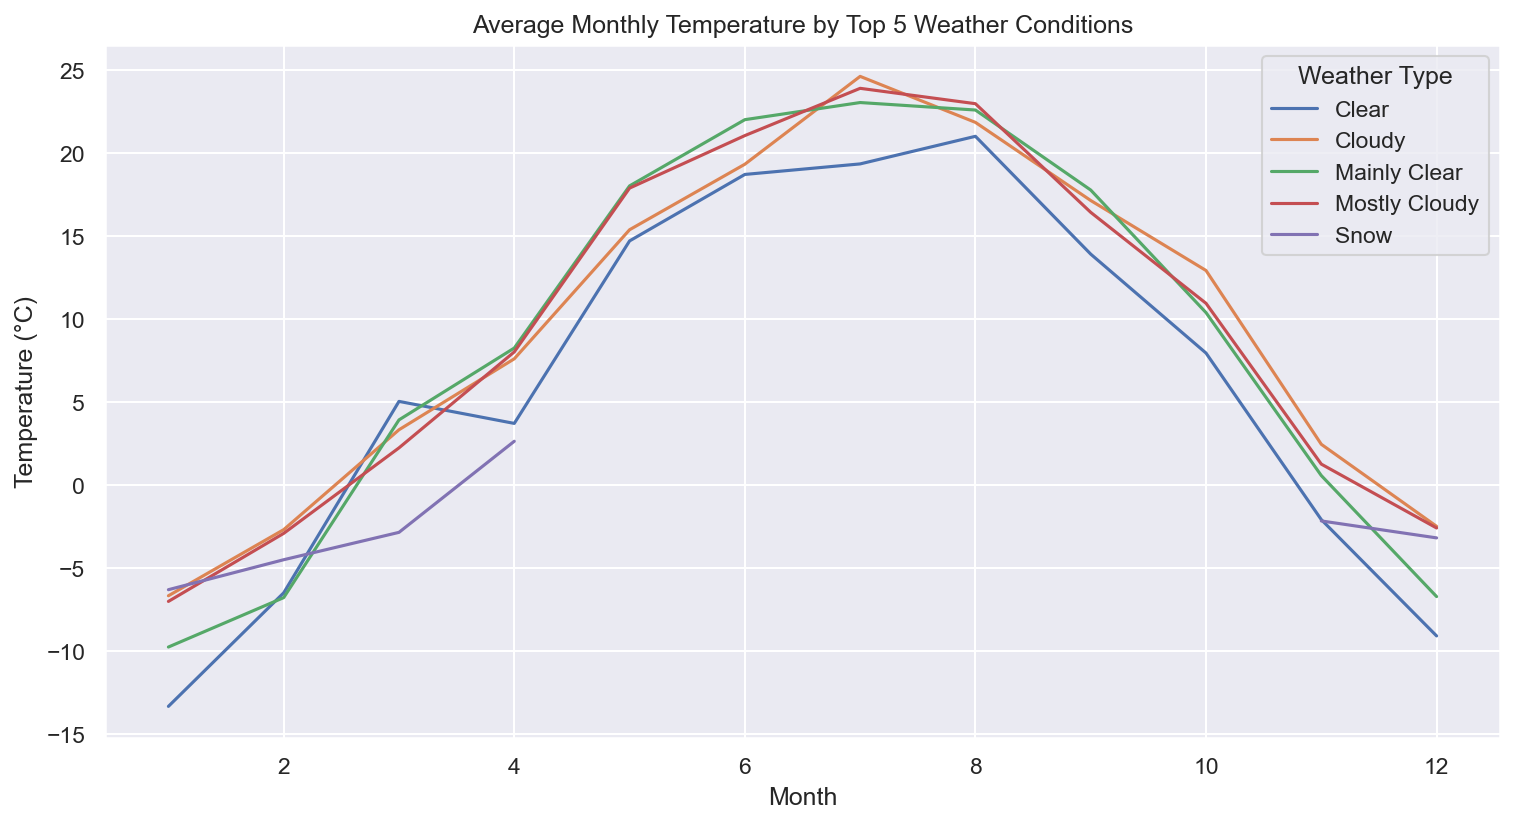

In [304]:
# Selecting the top 5 most common weather conditions
top_5_weather = df['Weather'].value_counts().nlargest(5).index

# Filtering dataset for only these top 5 weather types
df_top5 = df[df['Weather'].isin(top_5_weather)]

# Group by Month and Weather for temperature analysis
df_top5.groupby(['Month', 'Weather'])['Temp_C'].mean().unstack().plot(figsize=(12,6))

plt.title("Average Monthly Temperature by Top 5 Weather Conditions")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.legend(title="Weather Type")
plt.show()


### `Interpretation:`
- Helps understand how weather change month to month

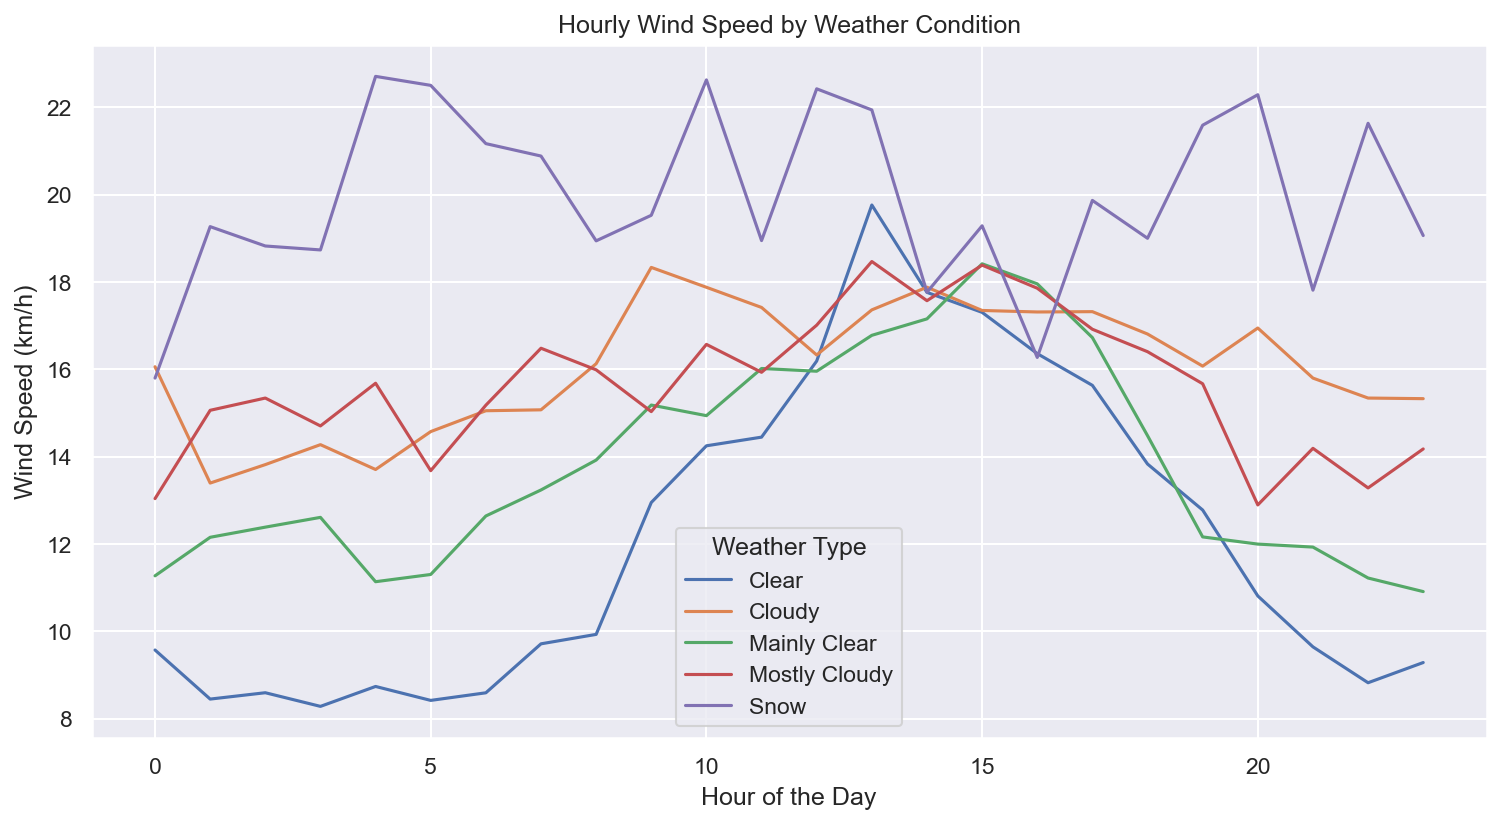

In [307]:
df_top5.groupby(['Hour', 'Weather'])['Wind Speed_km/h'].mean().unstack().plot(figsize=(12,6))
plt.title("Hourly Wind Speed by Weather Condition")
plt.xlabel("Hour of the Day")
plt.ylabel("Wind Speed (km/h)")
plt.legend(title="Weather Type")
plt.show()

### `Inference:`
- snowy weather has the highest windspeed

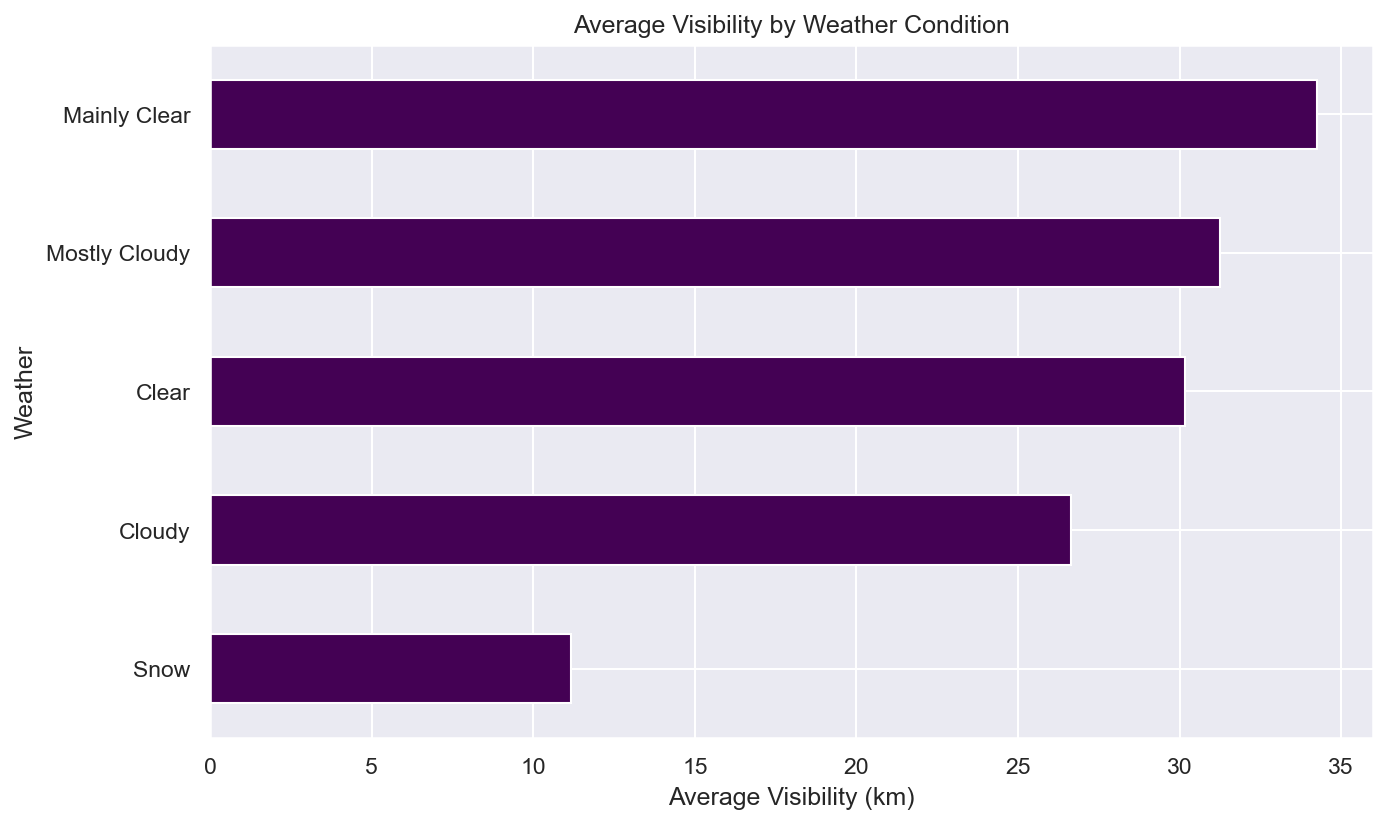

In [310]:
df_top5.groupby('Weather')['Visibility_km'].mean().sort_values().plot(kind='barh', figsize=(10,6), colormap='viridis')
plt.title("Average Visibility by Weather Condition")
plt.xlabel("Average Visibility (km)")
plt.show()


### `Inference:`
- snowy weather has the lowest visibility

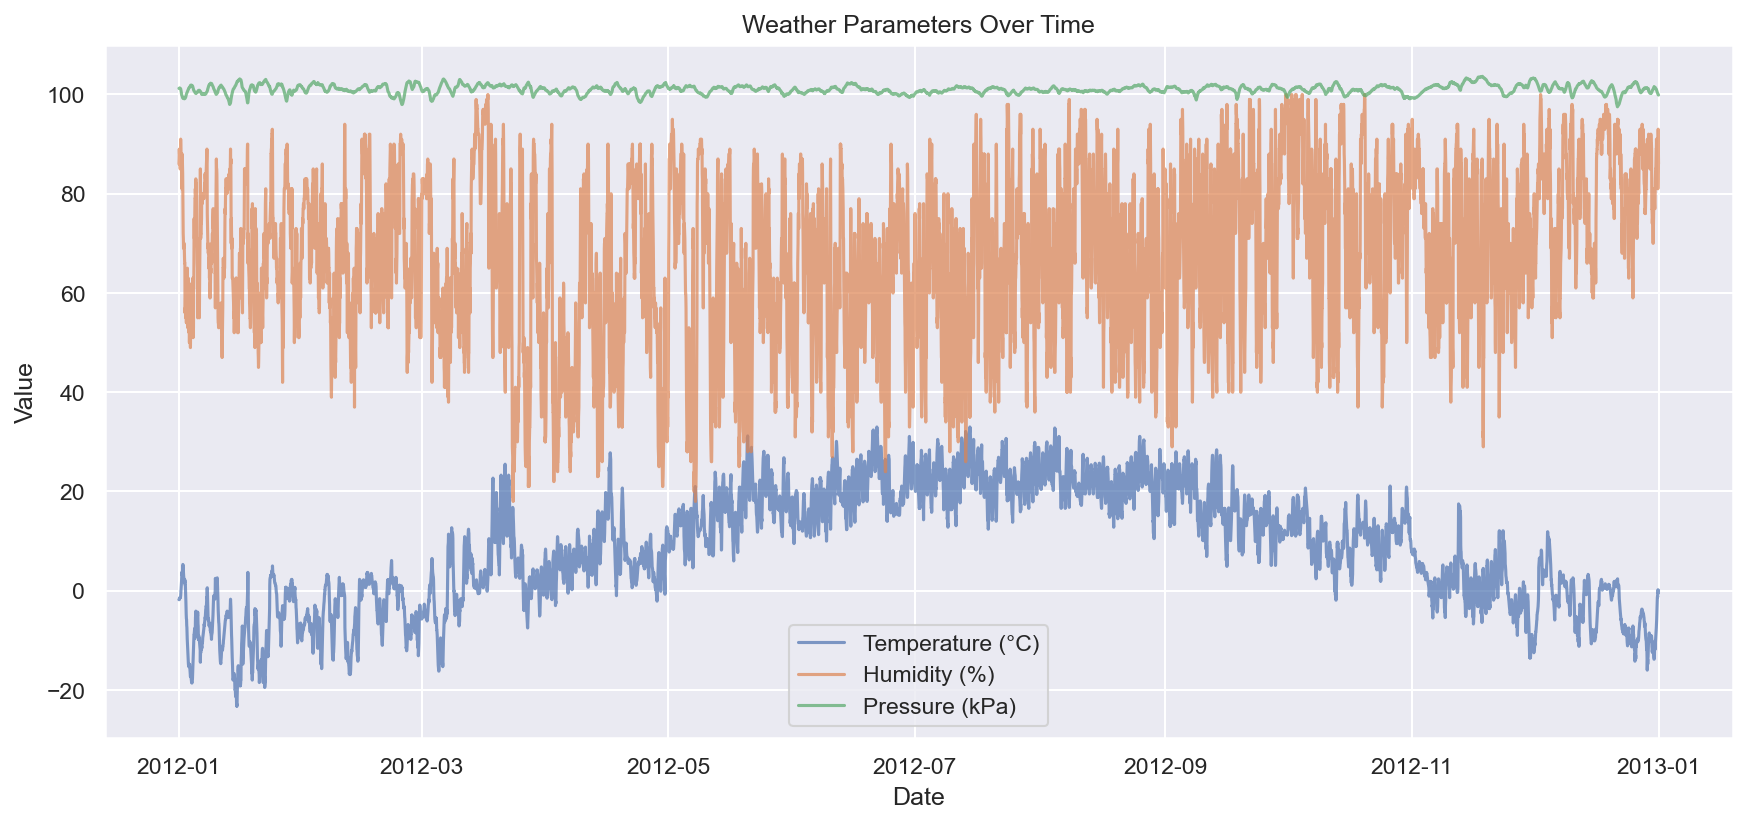

In [313]:
plt.figure(figsize=(14,6))
plt.plot(df['Date/Time'], df['Temp_C'], label='Temperature (°C)', alpha=0.7)
plt.plot(df['Date/Time'], df['Rel Hum_%'], label='Humidity (%)', alpha=0.7)
plt.plot(df['Date/Time'], df['Press_kPa'], label='Pressure (kPa)', alpha=0.7)
plt.legend()
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Weather Parameters Over Time")
plt.show()


### `Inference:`
- shows how weather parameters have changed over time
- helps identifying seasonal patterns

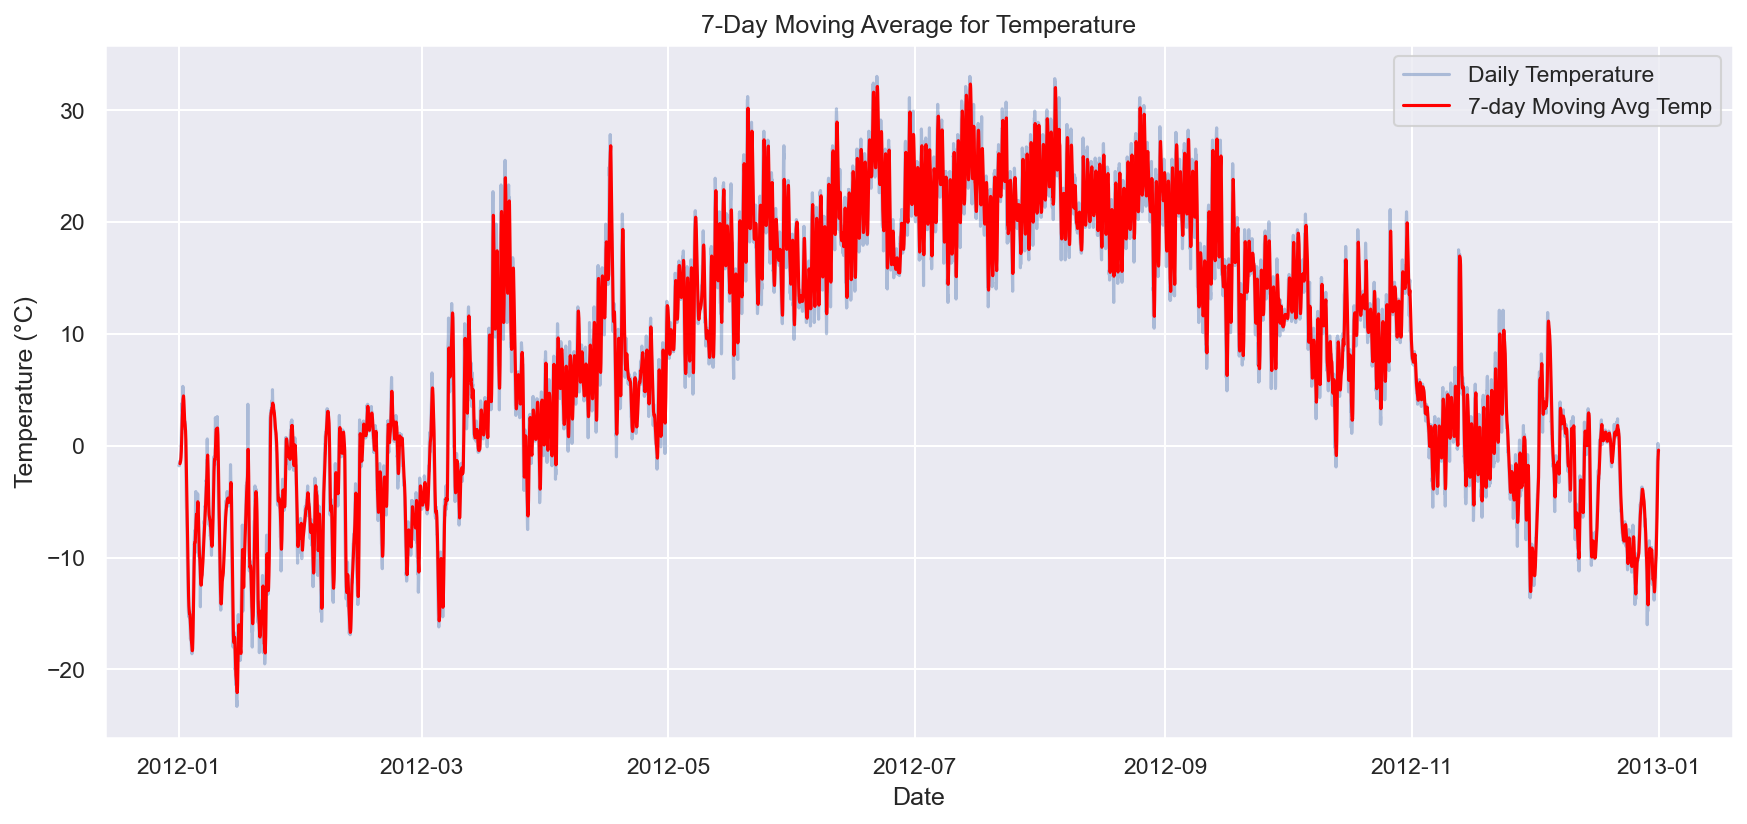

In [316]:
df['Temp_MA7'] = df['Temp_C'].rolling(window=7).mean()

plt.figure(figsize=(14,6))
plt.plot(df['Date/Time'], df['Temp_C'], alpha=0.4, label="Daily Temperature")
plt.plot(df['Date/Time'], df['Temp_MA7'], label="7-day Moving Avg Temp", color='red')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("7-Day Moving Average for Temperature")
plt.show()


### `Interpretation:`
- Helps smooth out short-term fluctuations and highlight long-term trends.

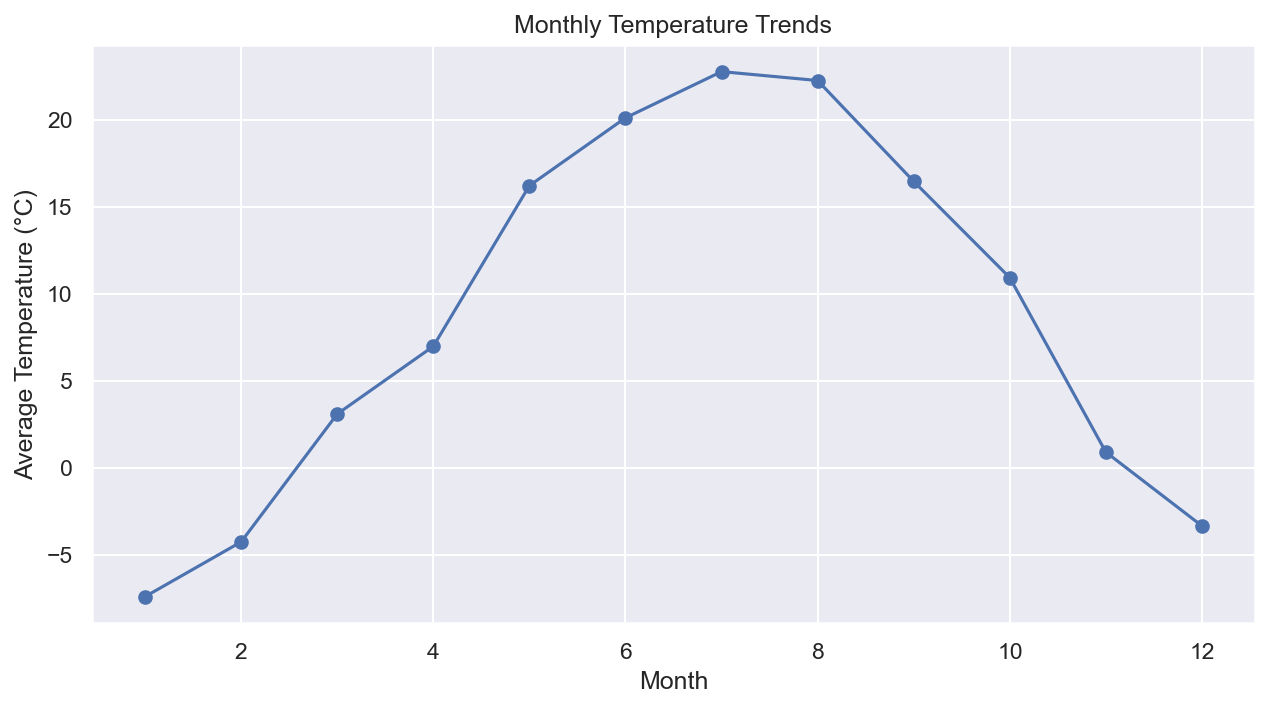

In [319]:
df.groupby('Month')['Temp_C'].mean().plot(kind='line', marker='o', figsize=(10,5))
plt.xlabel("Month")
plt.ylabel("Average Temperature (°C)")
plt.title("Monthly Temperature Trends")
plt.show()


### `Inference:`
- In the month of june july august the temperature reaches maximum

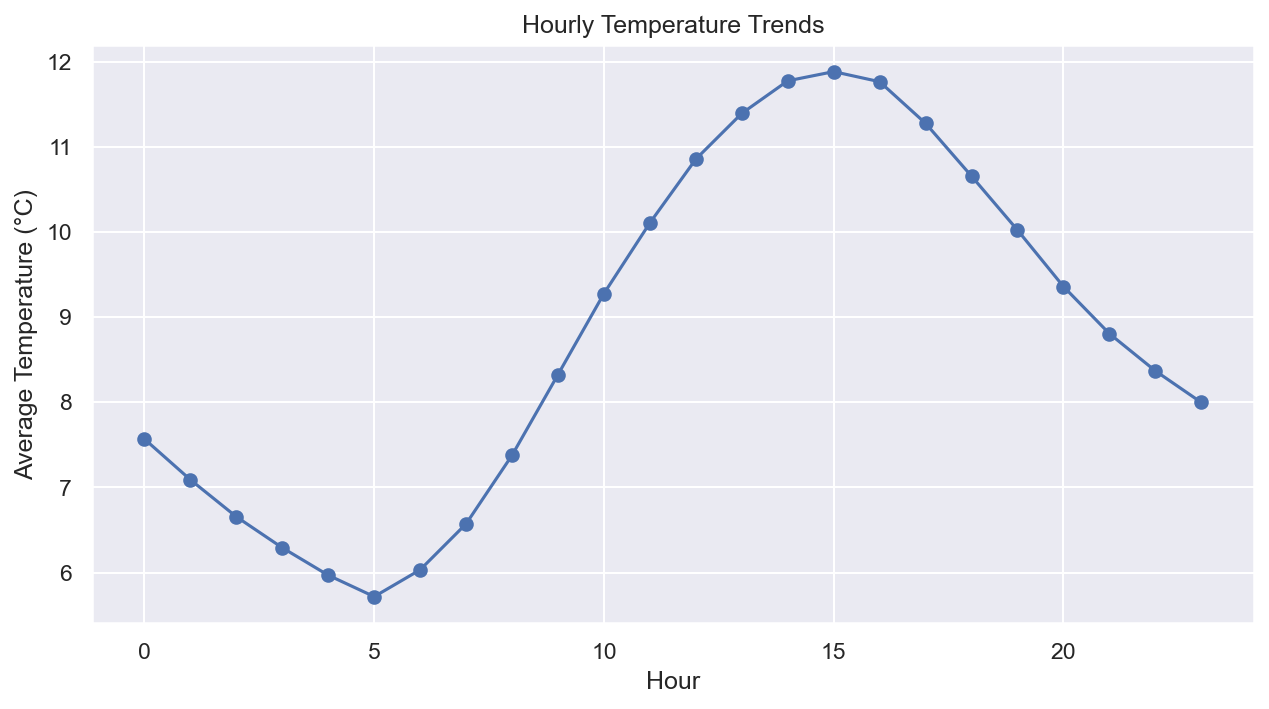

In [322]:
df.groupby('Hour')['Temp_C'].mean().plot(kind='line', marker='o', figsize=(10,5))
plt.xlabel("Hour")
plt.ylabel("Average Temperature (°C)")
plt.title("Hourly Temperature Trends")
plt.show()


### `Inference:`
- Shows how the average temperature changes in a day

C:\Users\TUFAN\AppData\Local\Temp\ipykernel_12868\165339793.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Temp_C', data=df, palette="coolwarm")


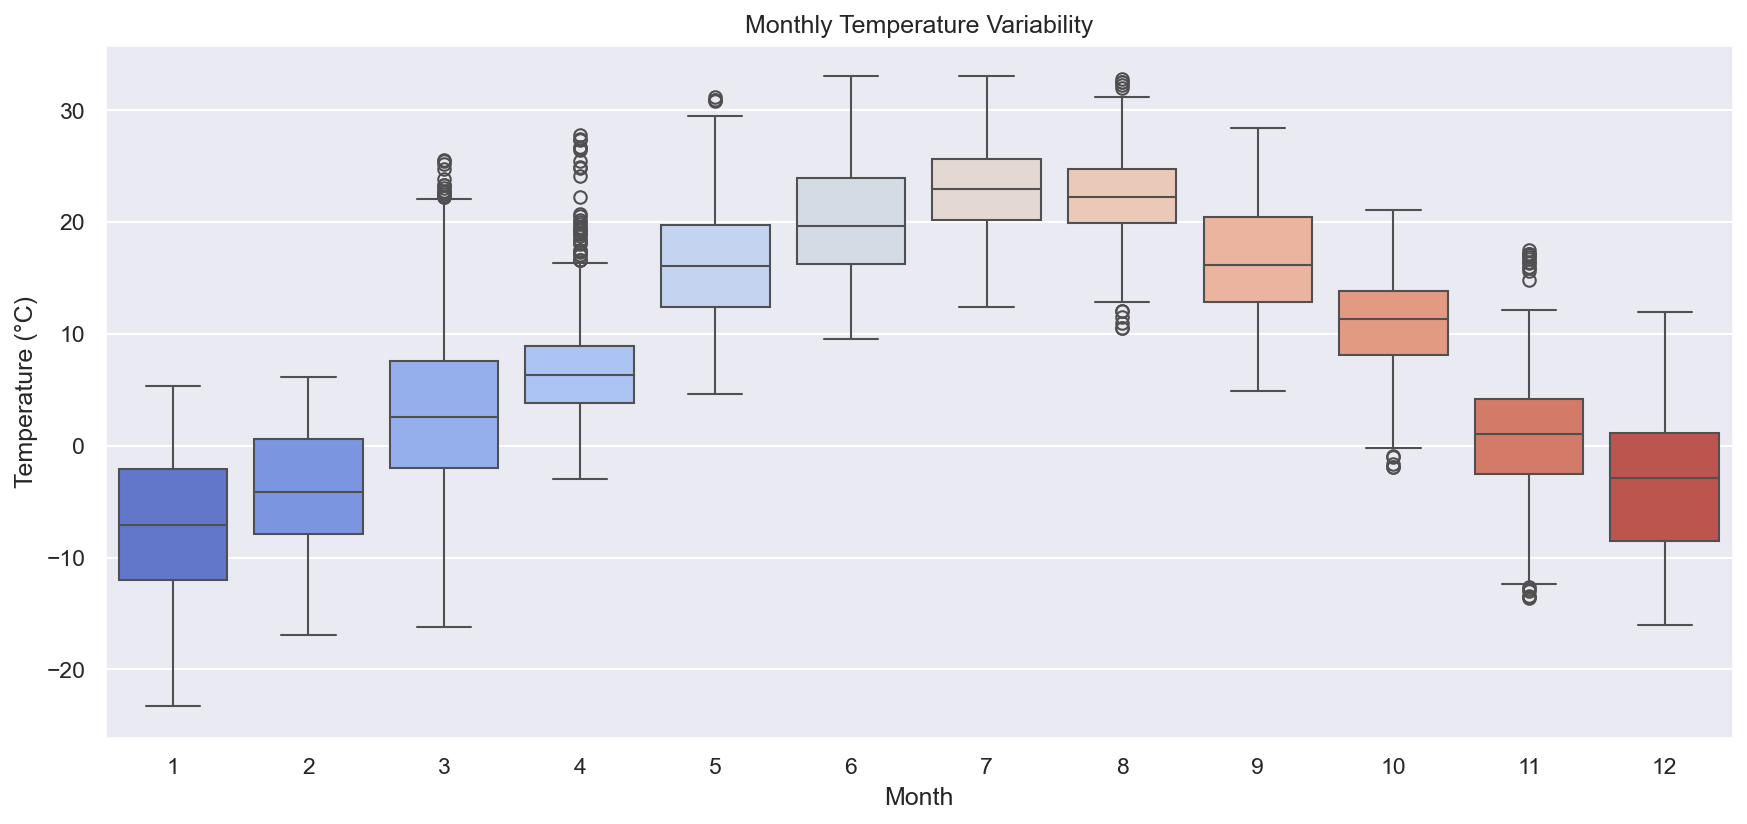

In [325]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Month', y='Temp_C', data=df, palette="coolwarm")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.title("Monthly Temperature Variability")
plt.show()


### `Inference:`
- Shows temperature variations within each month

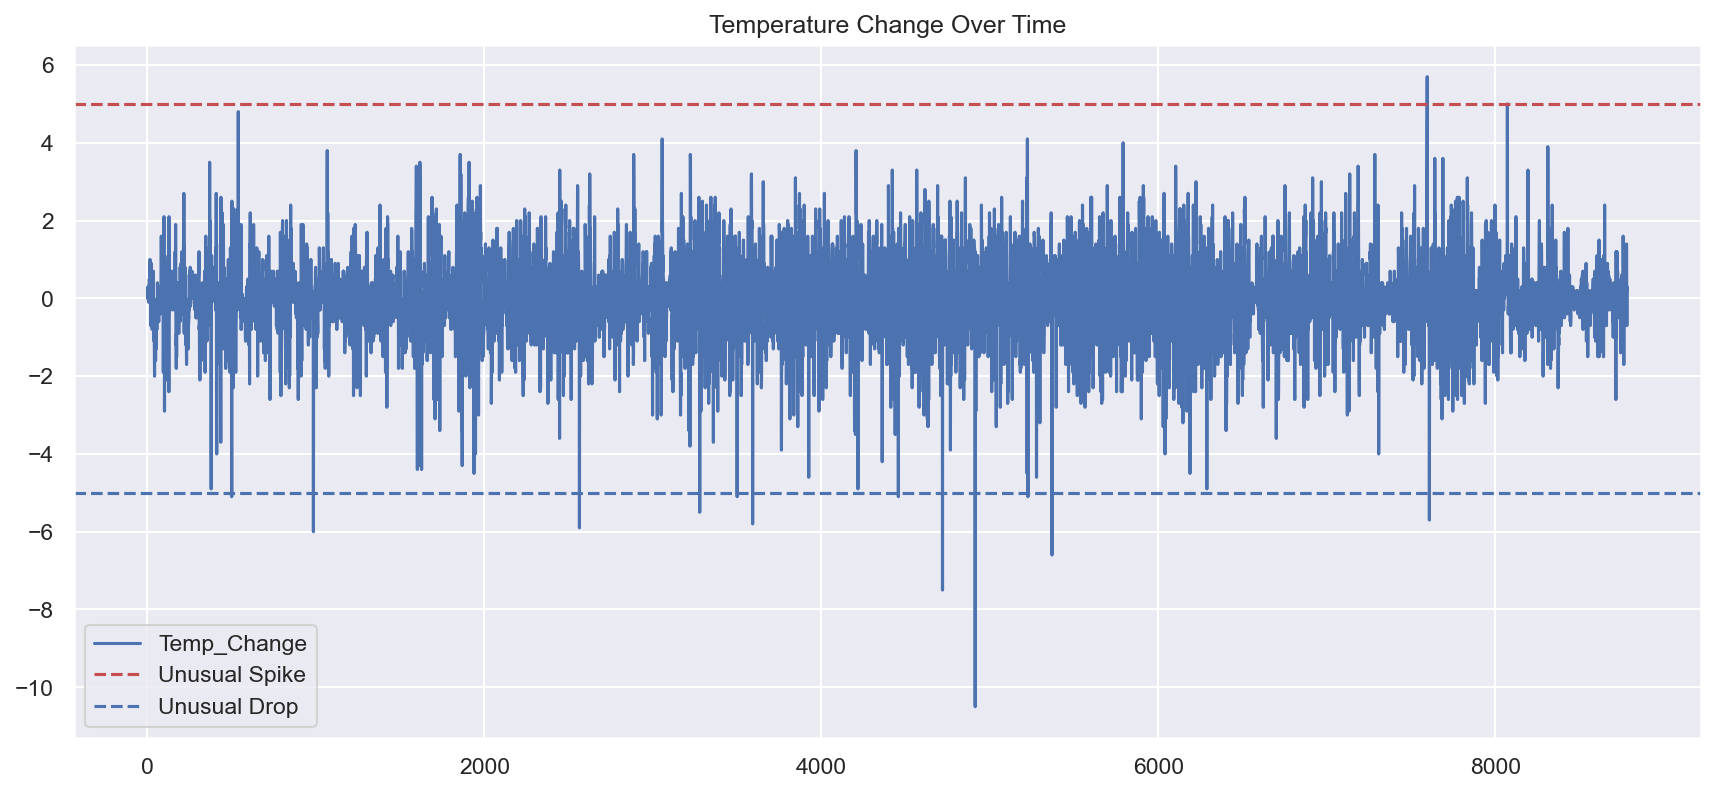

In [328]:
df['Temp_Change'] = df['Temp_C'].diff() # Calculate the change in temperature from the previous row
df['Temp_Change'].plot(figsize=(14,6), title="Temperature Change Over Time")
plt.axhline(y=5, color='r', linestyle='--', label='Unusual Spike')
plt.axhline(y=-5, color='b', linestyle='--', label='Unusual Drop')
plt.legend()
plt.show()


### `Inference:`
- In the month of july and august there is huge temperature fluctuations